In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plants = ["AV", "C", "D", "G", "M", "Y"]
xls_files = {}

for plant in plants:
    xls = pd.ExcelFile(
        f"../../../data/raw/203/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
        engine="openpyxl",
    )
    xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AV ['INSTRUÇÕES', '122', '24', '134', '50']
Palnt:  C ['INSTRUÇÕES', '114', '36', '144', '74', '54']
Palnt:  D ['INSTRUÇÕES', '10', '131', '117', '197', '8']
Palnt:  G ['INSTRUÇÕES', '3', '160', '49', '137', '2', '17', '142']
Palnt:  M ['INSTRUÇÕES', '147', '141', '159', '73', '170', '53', '135', '67', '161']
Palnt:  Y ['INSTRUÇÕES', '77', '151', '179', '136', '71', '113']


<IPython.core.display.Javascript object>

In [5]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [6]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Cidade, Unnamed: 1_level_2)                 19923 non-null  object 
 1   (Data, Produção)                             19511 non-null  object 
 2   (Horário, Produção)                          0 non-null      float64
 3   (Data, Medida)                               19511 non-null  object 
 4   (Horário, Medida)                            0 non-null      float64
 5   (Tipo de cimento, Unnamed: 6_level_2)        18674 non-null  object 
 6   (Classe de resistência, Unnamed: 7_level_2)  18674 non-null  object 
 7   (Obs., Unnamed: 8_level_2)                   3650 non-null   object 
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


<IPython.core.display.Javascript object>

In [8]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      flo

<IPython.core.display.Javascript object>

In [9]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 1.1 MB


<IPython.core.display.Javascript object>

In [10]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                7857 non-null   float64
 1   MgO                18883 non-null  object 
 2   Na2O               18823 non-null  object 
 3   Al2O3              7859 non-null   float64
 4   SiO2               7859 non-null   float64
 5   SO3                18876 non-null  object 
 6   K2O                18205 non-null  object 
 7   TiO2               2843 non-null   float64
 8   Fe2O3              7810 non-null   float64
 9   Perda ao fogo      18831 non-null  object 
 10  Resíduo insolúvel  11760 non-null  object 
 11  Obs.               0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 1.8+ MB


<IPython.core.display.Javascript object>

In [11]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 n

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [13]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            19331 non-null  object 
 1   (Unnamed: 137_level_1, #200)              17904 non-null  object 
 2   (Unnamed: 138_level_1, #325)              19170 non-null  object 
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  6921 non-null   object 
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 947.1+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           18883 non-null  object 
 1   (Tempo de pega, Fim)              18467 non-null  object 
 2   (Resistência à compressão, 1 d)   18909 non-null  object 
 3   (Resistência à compressão, 3 d)   14713 non-null  float64
 4   (Resistência à compressão, 7 d)   18847 non-null  object 
 5   (Resistência à compressão, 28 d)  18614 non-null  object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [15]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [16]:
df = pd.concat(
    [
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [17]:
COLUMNS_TO_DROP = [
    ("Data", "Produção"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Cidade", "Unnamed: 1_level_2"): "Plant",
    ("Data", "Medida"): "Date",
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("FIBROCMENTO", "Fibrocimento")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIEnsacado", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIGranel", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Ensacado", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Granel", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIRS", "CP VARI")

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [18]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '1..10'
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: '             '
could not convert string to float: '  '
could not convert string to float: ' '
could not convert string to float: '1.6.0'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
coul

<IPython.core.display.Javascript object>

In [19]:
df = df[df["Plant"] == "C"].reset_index(drop=True)

<IPython.core.display.Javascript object>

# EDA

In [20]:
df.shape

(2878, 24)

<IPython.core.display.Javascript object>

In [21]:
df.head()

Plant                Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  \
0     C 2017-08-02 15:41:00  54.15  2.88  0.07   6.67  23.31  2.05  0.95   
1     C 2017-08-04 15:41:00  54.74  2.50  0.07   6.39  23.70  2.04  0.91   
2     C 2017-08-08 11:27:00  53.96  3.84  0.08   6.55  22.47  2.00  1.03   
3     C 2017-08-11 11:44:00  52.87  2.89  0.21   8.03  25.29  1.67  0.93   
4     C 2017-08-15 11:48:00  54.85  2.74  0.19   7.11  24.36  2.02  0.98   

   TiO2  ...  #200  #325  Specific Gravity  Final setting time  \
0  0.32  ...   3.9  12.0               NaN               220.0   
1  0.32  ...   3.1  15.9               NaN               220.0   
2  0.33  ...   3.1  10.0               NaN               215.0   
3  0.36  ...   4.1  19.2               NaN               220.0   
4  0.32  ...   3.1  16.8               NaN               220.0   

   Initial setting time   CS1    CS3    CS7   CS28  Cement_Type  
0                   NaN  7.58  18.18  24.20  33.20    CP II-E32  
1                   NaN  7.93  19.63  25.43  34.40    CP II-E32  
2                   NaN  8.58  19.08  25.98  37.03    CP II-E32  
3                   NaN  7.33  19.28  24.95  33.28    CP II-E32  
4                   NaN  7.70  17.28  24.88  33.70    CP II-E32  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [22]:
df.tail()

Plant                Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  \
2873     C 2023-04-12 11:18:00  60.24  2.68  0.01   4.67  18.19  2.96  1.16   
2874     C 2023-04-17 10:49:00  59.78  3.48  0.02   4.40  19.74  3.02  1.06   
2875     C 2023-04-18 10:40:00  61.25  2.80  0.02   4.80  19.35  2.93  1.10   
2876     C 2023-04-22 15:04:00  61.52  2.91  0.02   4.95  19.36  2.95  1.16   
2877     C 2023-04-24 10:47:00    NaN   NaN   NaN    NaN    NaN   NaN   NaN   

      TiO2  ...  #200  #325  Specific Gravity  Final setting time  \
2873  0.07  ...   0.0  1.90               NaN               155.0   
2874  0.07  ...   0.0  1.86               NaN               155.0   
2875  0.02  ...   0.0  1.99               NaN               155.0   
2876  0.08  ...   0.0  2.12               NaN               160.0   
2877   NaN  ...   0.0  1.97               NaN               145.0   

      Initial setting time    CS1    CS3    CS7  CS28  Cement_Type  
2873                 220.0  27.13  38.57  41.65   NaN      CP VARI  
2874                 215.0  27.40  37.90  41.42   NaN      CP VARI  
2875                 235.0  27.41  37.86  41.86   NaN      CP VARI  
2876                 220.0  27.40    NaN    NaN   NaN      CP VARI  
2877                 230.0  27.11    NaN    NaN   NaN      CP VARI  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 2878 non-null   object        
 1   Date                  2878 non-null   datetime64[ns]
 2   CaO                   2872 non-null   float64       
 3   MgO                   2874 non-null   float64       
 4   Na2O                  2862 non-null   float64       
 5   Al2O3                 2874 non-null   float64       
 6   SiO2                  2874 non-null   float64       
 7   SO3                   2874 non-null   float64       
 8   K2O                   2874 non-null   float64       
 9   TiO2                  2843 non-null   float64       
 10  Fe2O3                 2874 non-null   float64       
 11  Loss on Ignition      2874 non-null   float64       
 12  Insoluble Residue     2874 non-null   float64       
 13  Blaine            

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [24]:
df.dtypes.value_counts()

float64           21
object             2
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [25]:
df.describe().transpose()

count                           mean  \
Date                    2878  2020-11-10 13:39:56.831132672   
CaO                   2872.0                      58.922615   
MgO                   2874.0                       2.612279   
Na2O                  2862.0                       0.059752   
Al2O3                 2874.0                       5.138633   
SiO2                  2874.0                      18.918166   
SO3                   2874.0                       2.869217   
K2O                   2874.0                       0.937603   
TiO2                  2843.0                       0.229187   
Fe2O3                 2874.0                       2.846802   
Loss on Ignition      2874.0                       6.597989   
Insoluble Residue     2874.0                       1.531635   
Blaine                2876.0                    4430.111266   
#200                  2876.0                       0.650817   
#325                  2876.0                       3.380709   
Specific Gravity        41.0                       3.055854   
Final setting time    2876.0                     165.163421   
Initial setting time  2773.0                     221.813559   
CS1                   2876.0                       20.17153   
CS3                   2864.0                      30.572057   
CS7                   2864.0                      35.903422   
CS28                  2829.0                      43.732124   

                                      min                  25%  \
Date                  2017-06-28 17:10:00  2019-09-10 16:44:00   
CaO                                 48.45              57.0275   
MgO                                  0.61                 2.11   
Na2O                                -0.09                 0.02   
Al2O3                                3.88                 4.64   
SiO2                                 8.37                17.17   
SO3                                   0.0                 2.53   
K2O                                  0.07                 0.81   
TiO2                                  0.0                 0.22   
Fe2O3                                1.75                 2.61   
Loss on Ignition                     2.72                 5.52   
Insoluble Residue                     0.1                 1.08   
Blaine                             3050.0               3880.0   
#200                                  0.0                  0.0   
#325                                  0.2               1.2275   
Specific Gravity                     2.97                 3.03   
Final setting time                  120.0                145.0   
Initial setting time                140.0                200.0   
CS1                                  5.18                12.88   
CS3                                 13.66                 22.8   
CS7                                  20.1              27.9725   
CS28                                31.53                36.25   

                                      50%                  75%  \
Date                  2021-01-11 15:06:00  2022-03-02 14:09:00   
CaO                                 60.02                61.42   
MgO                                   2.6                  3.0   
Na2O                                 0.05                 0.08   
Al2O3                                4.98                 5.58   
SiO2                                18.32                20.68   
SO3                                   3.0                 3.26   
K2O                                  0.96                 1.07   
TiO2                                 0.24                 0.27   
Fe2O3                                2.81                 2.93   
Loss on Ignition                     6.92                 7.61   
Insoluble Residue                    1.44                 1.82   
Blaine                             4600.0               4880.0   
#200                                 0.25                 0.95   
#325                                  2.1                  4.2  

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [26]:
df.describe(exclude="number").T

count unique      top  freq                           mean  \
Plant        2878      1        C  2878                            NaN   
Date         2878    NaN      NaN   NaN  2020-11-10 13:39:56.831132672   
Cement_Type  2878      4  CP VARI   889                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
Date         2017-06-28 17:10:00  2019-09-10 16:44:00  2021-01-11 15:06:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
Date         2022-03-02 14:09:00  2023-04-24 10:47:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [27]:
df["Plant"].unique()

array(['C'], dtype=object)

<IPython.core.display.Javascript object>

In [28]:
df["Cement_Type"].unique()

array(['CP II-E32', 'CP II-F40', 'CP II-E40', 'CP VARI'], dtype=object)

<IPython.core.display.Javascript object>

In [29]:
df["Plant"].value_counts()

Plant
C    2878
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["Cement_Type"].value_counts()

Cement_Type
CP VARI      889
CP II-E32    816
CP II-F40    631
CP II-E40    542
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1092685/2208889300.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


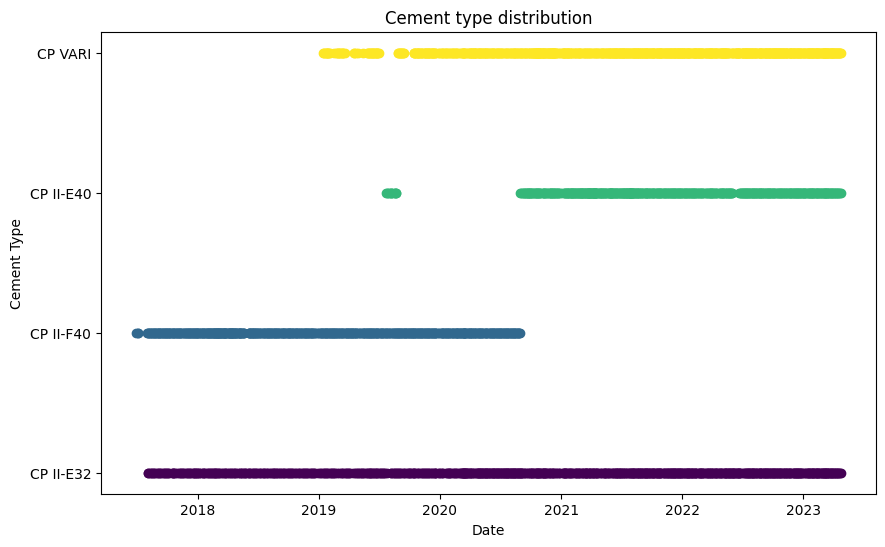

<IPython.core.display.Javascript object>

In [31]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 6))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()


In [32]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

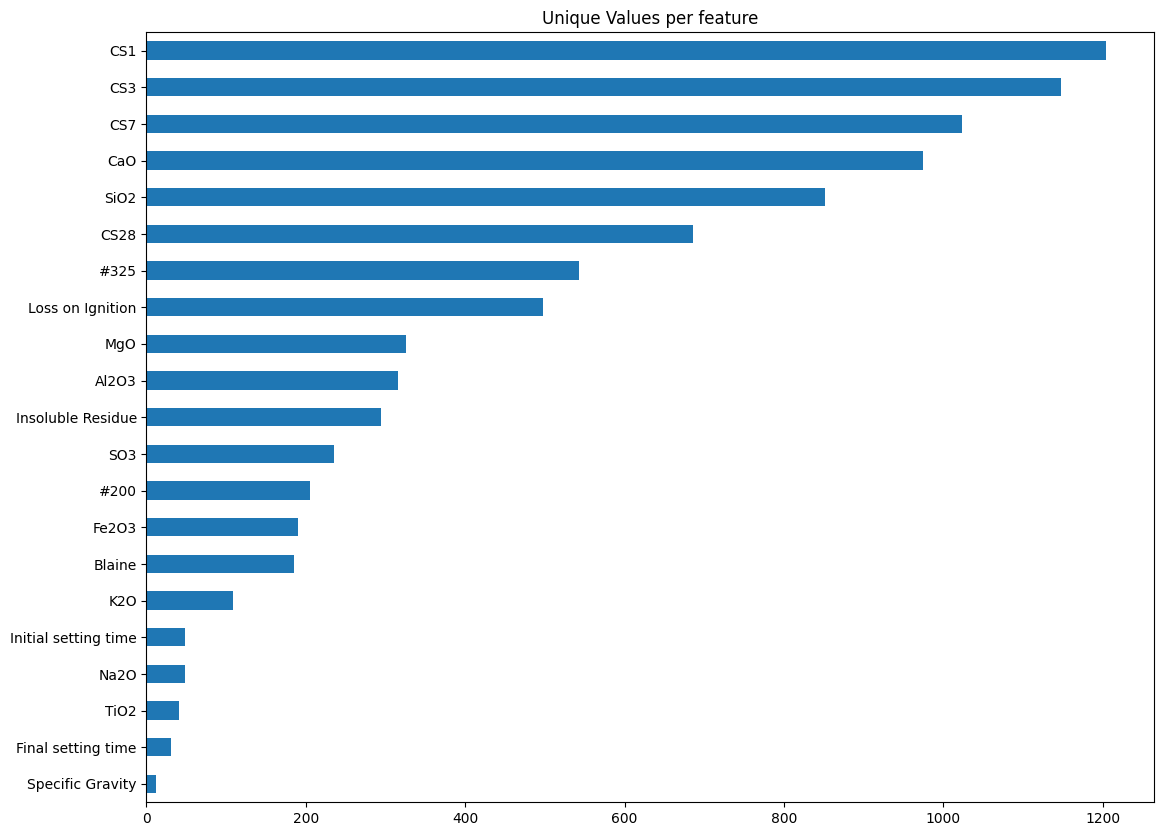

<IPython.core.display.Javascript object>

In [33]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type'), Text(2, 0, 'Date')])

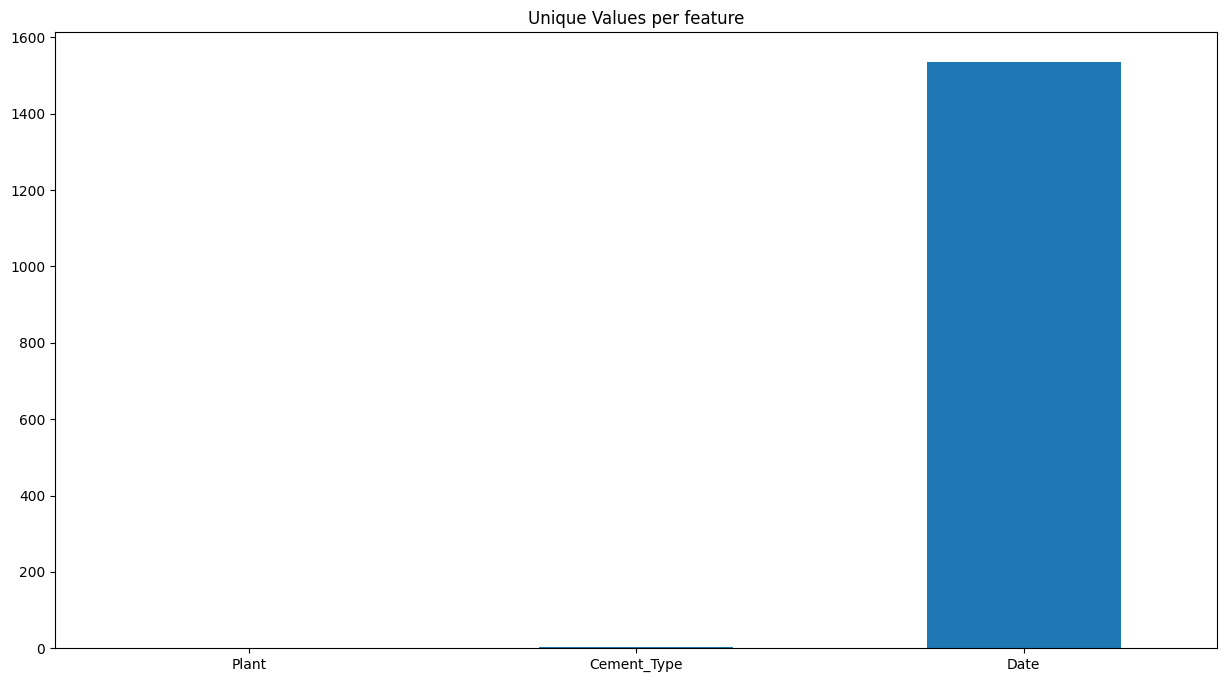

<IPython.core.display.Javascript object>

In [34]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type')])

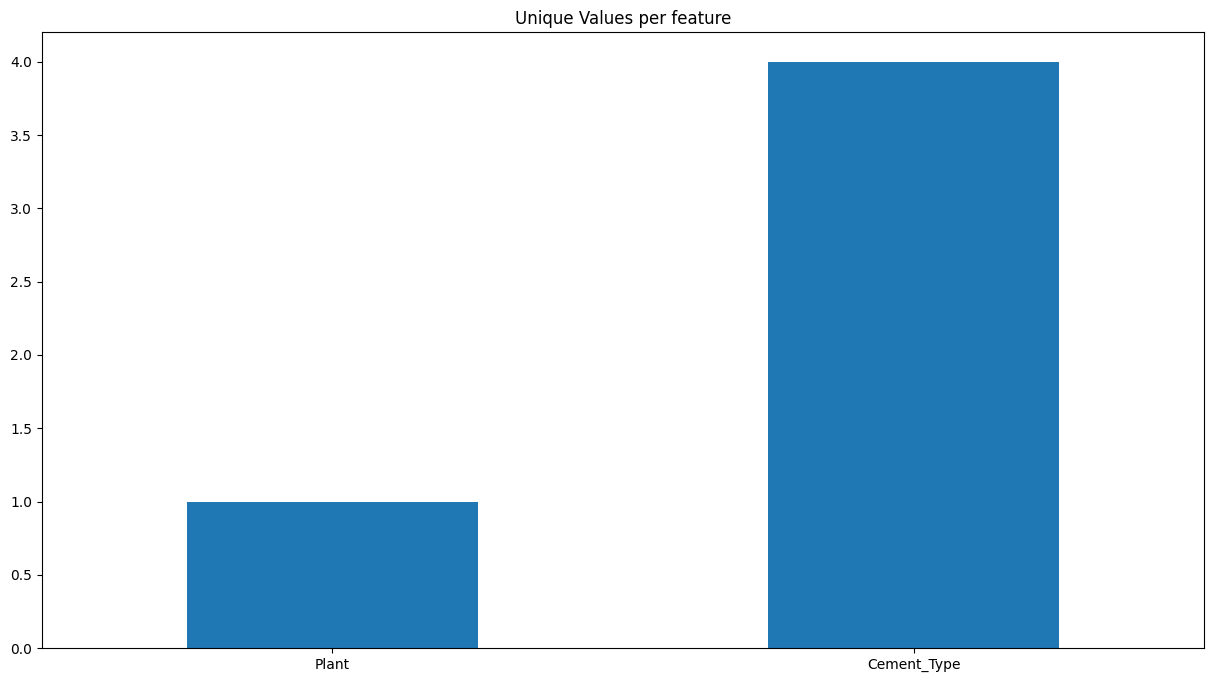

<IPython.core.display.Javascript object>

In [35]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [36]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 21 variables with missing values from a total of 24


<IPython.core.display.Javascript object>

In [37]:
df.isna().any()

Plant                   False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                   True
#200                     True
#325                     True
Specific Gravity         True
Final setting time       True
Initial setting time     True
CS1                      True
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [38]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [39]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 24 artists>

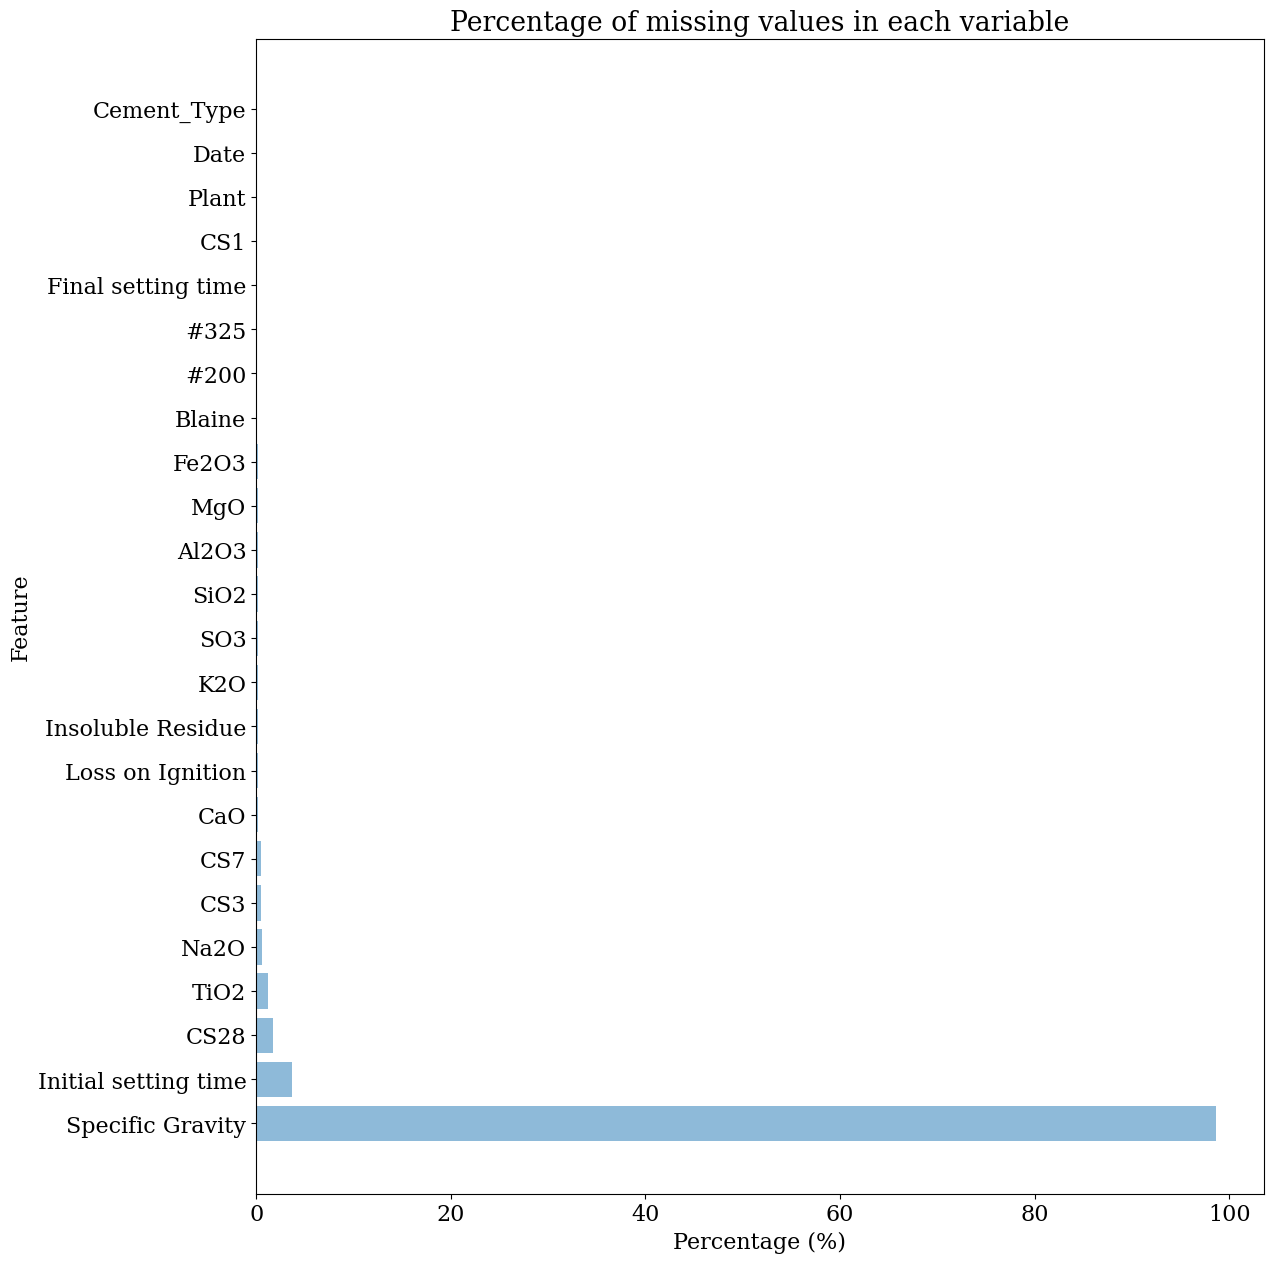

<IPython.core.display.Javascript object>

In [40]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

### Missing values per cement type

In [41]:
missing_values = []
for cem_type, group in df.groupby("Cement_Type"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(
        name=f"Missing (%) for {cem_type}"
    )
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [42]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

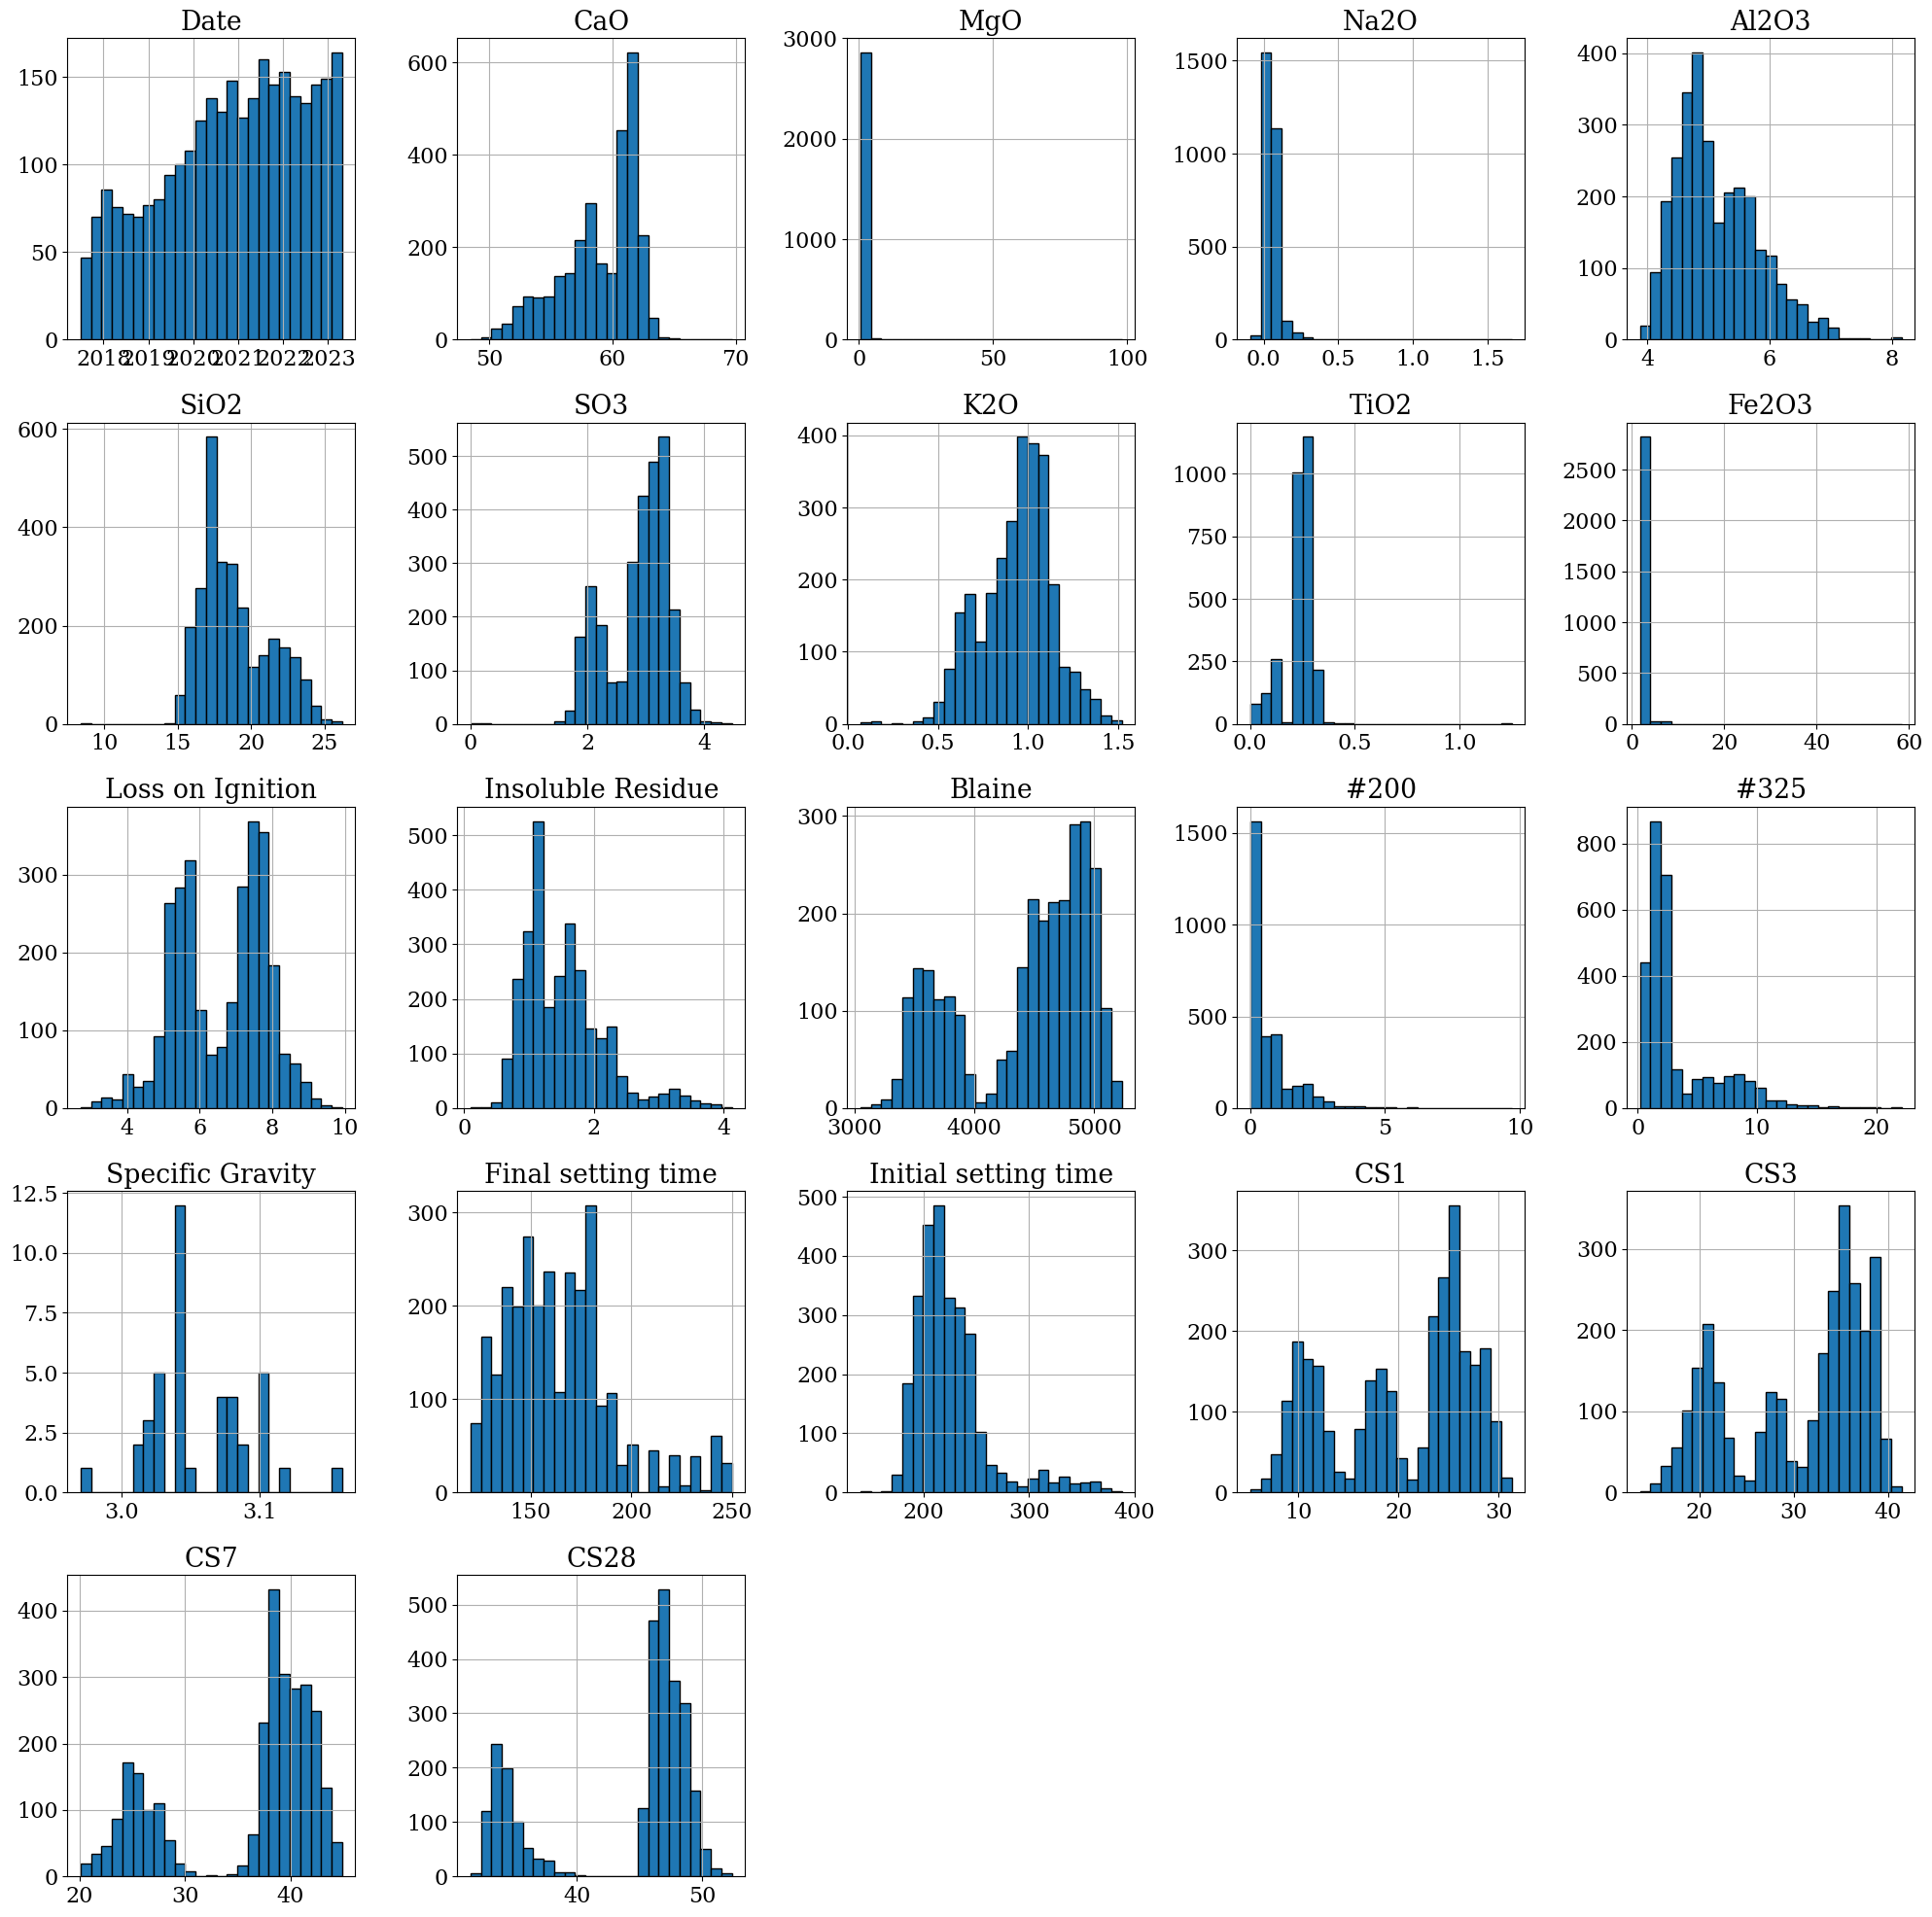

<IPython.core.display.Javascript object>

In [43]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

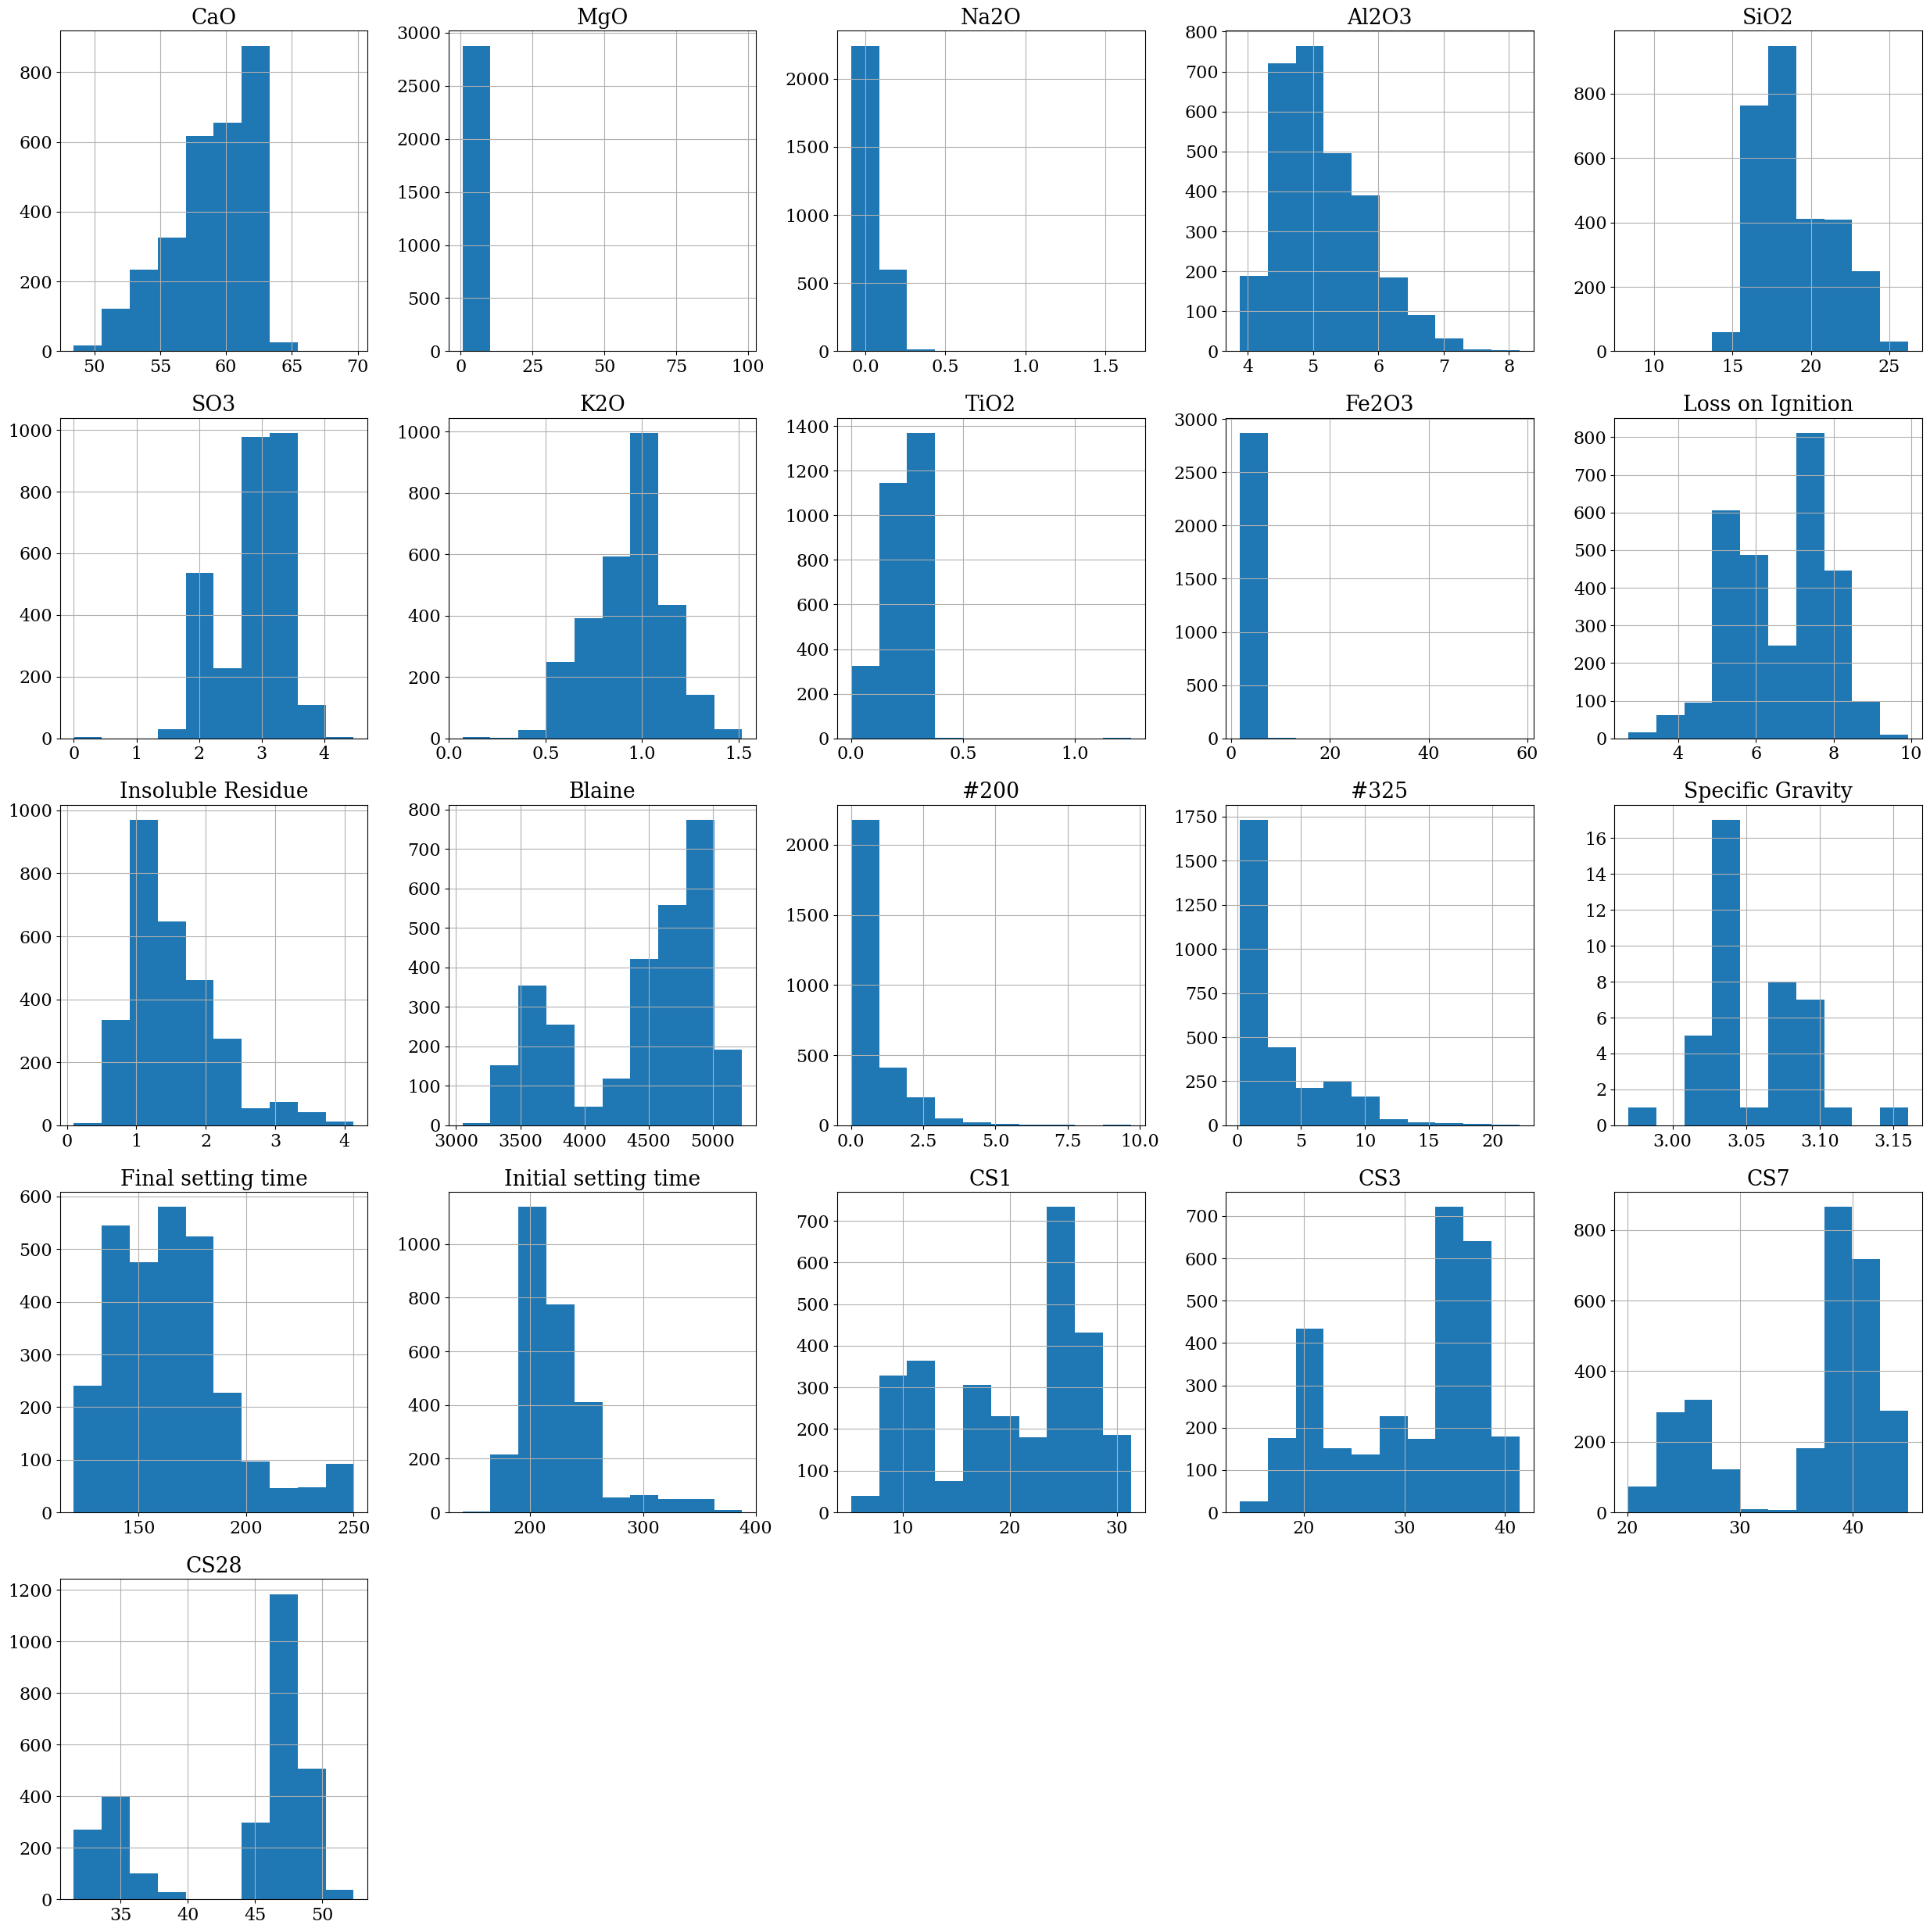

<IPython.core.display.Javascript object>

In [44]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

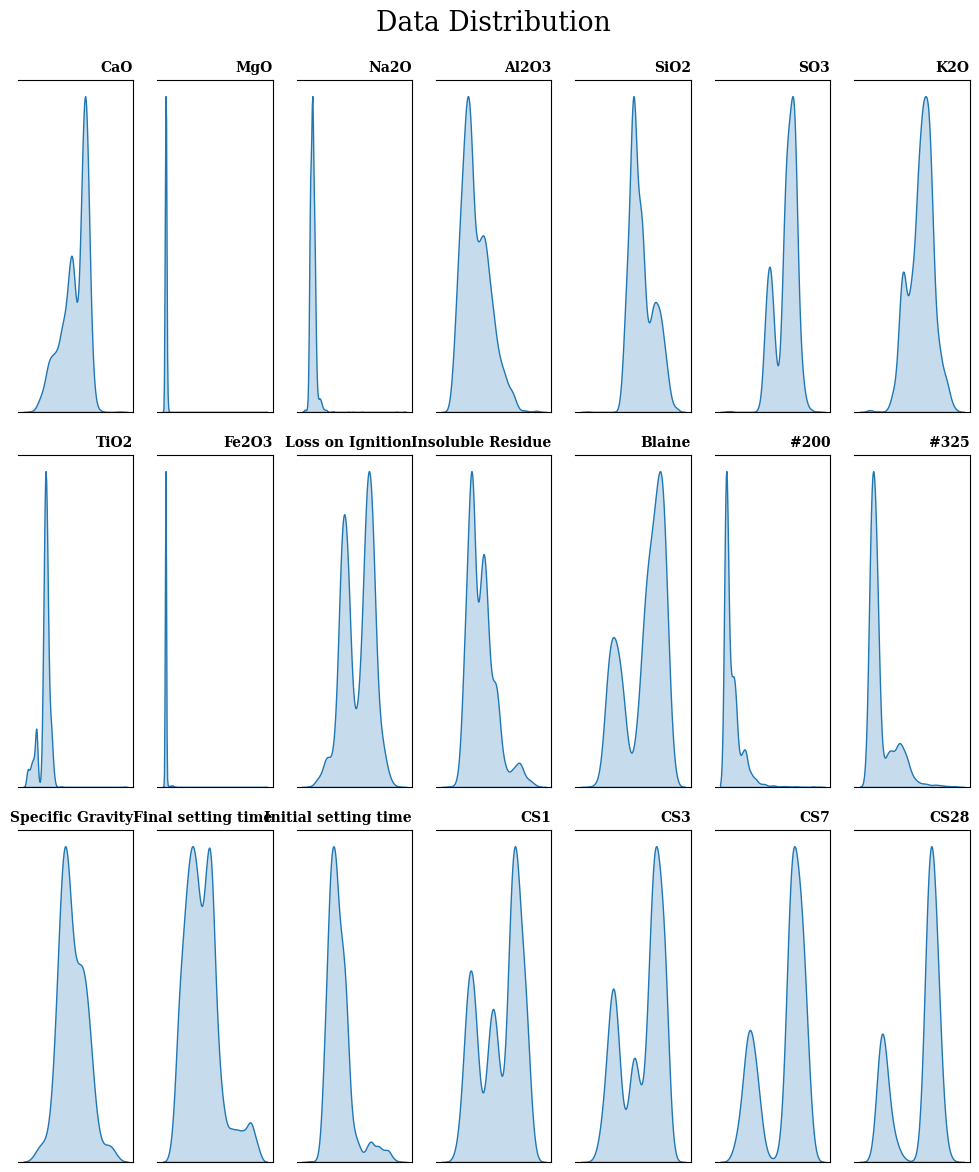

<IPython.core.display.Javascript object>

In [45]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

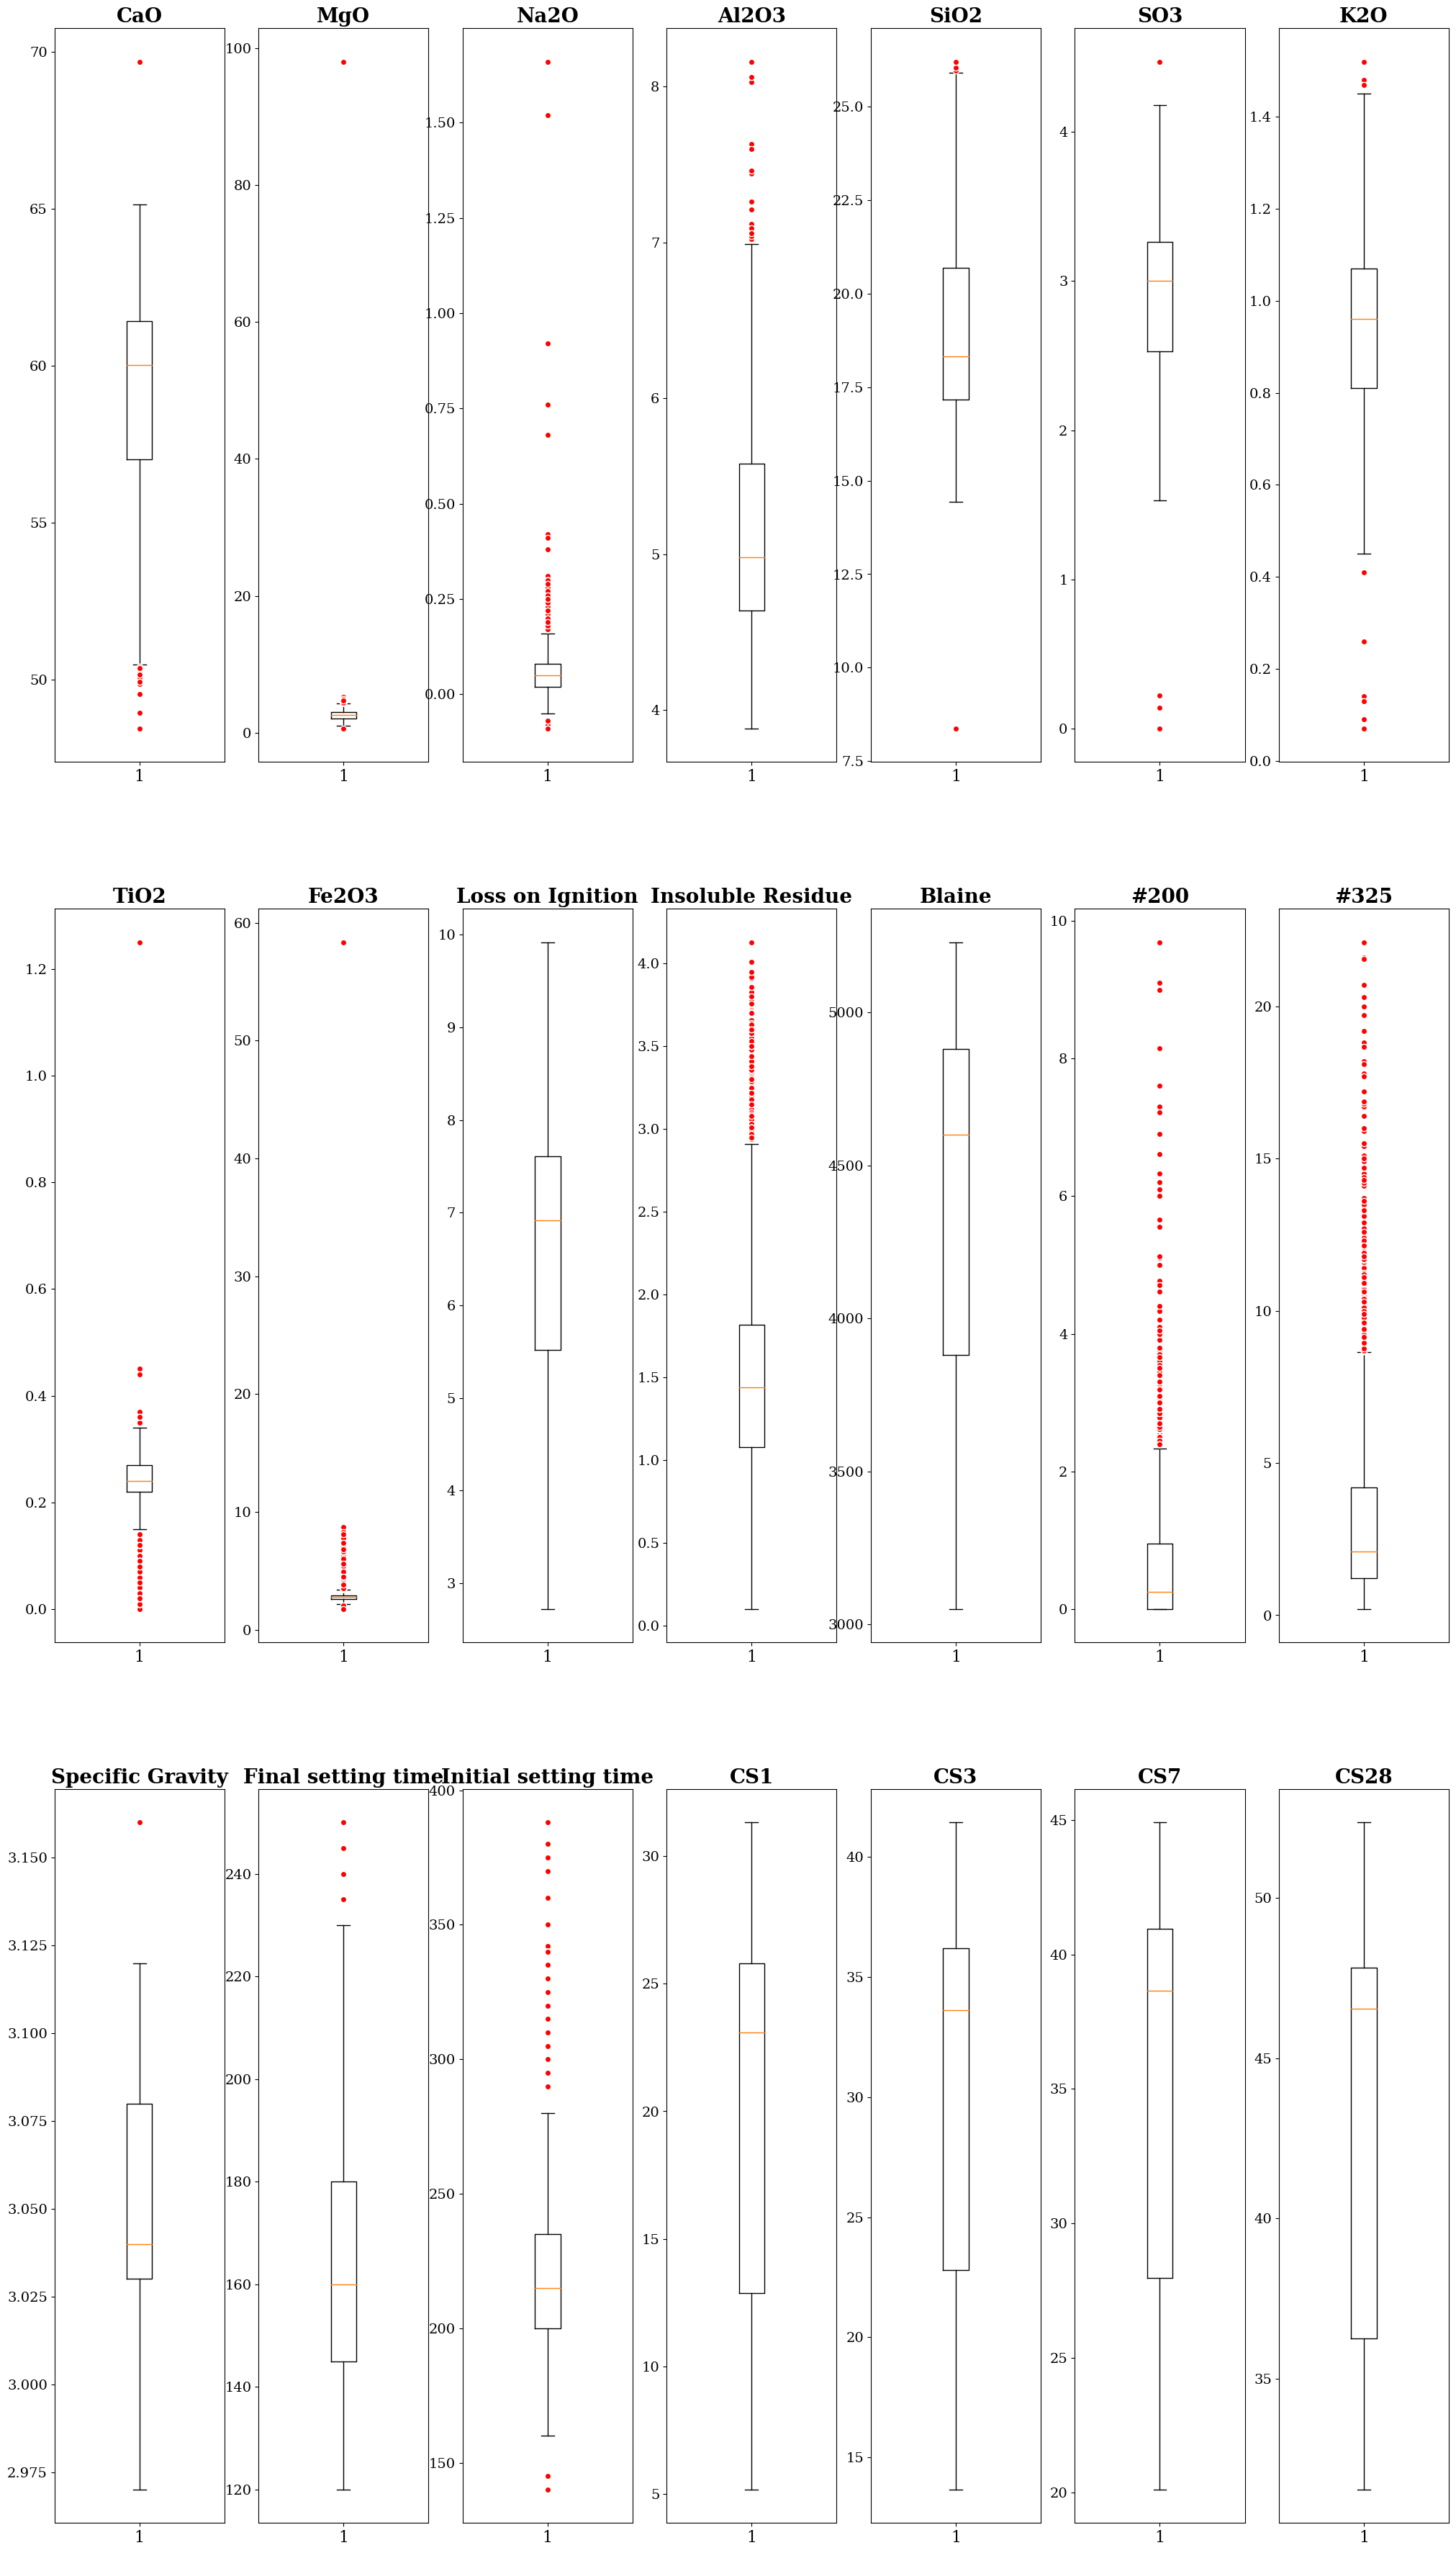

<IPython.core.display.Javascript object>

In [46]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

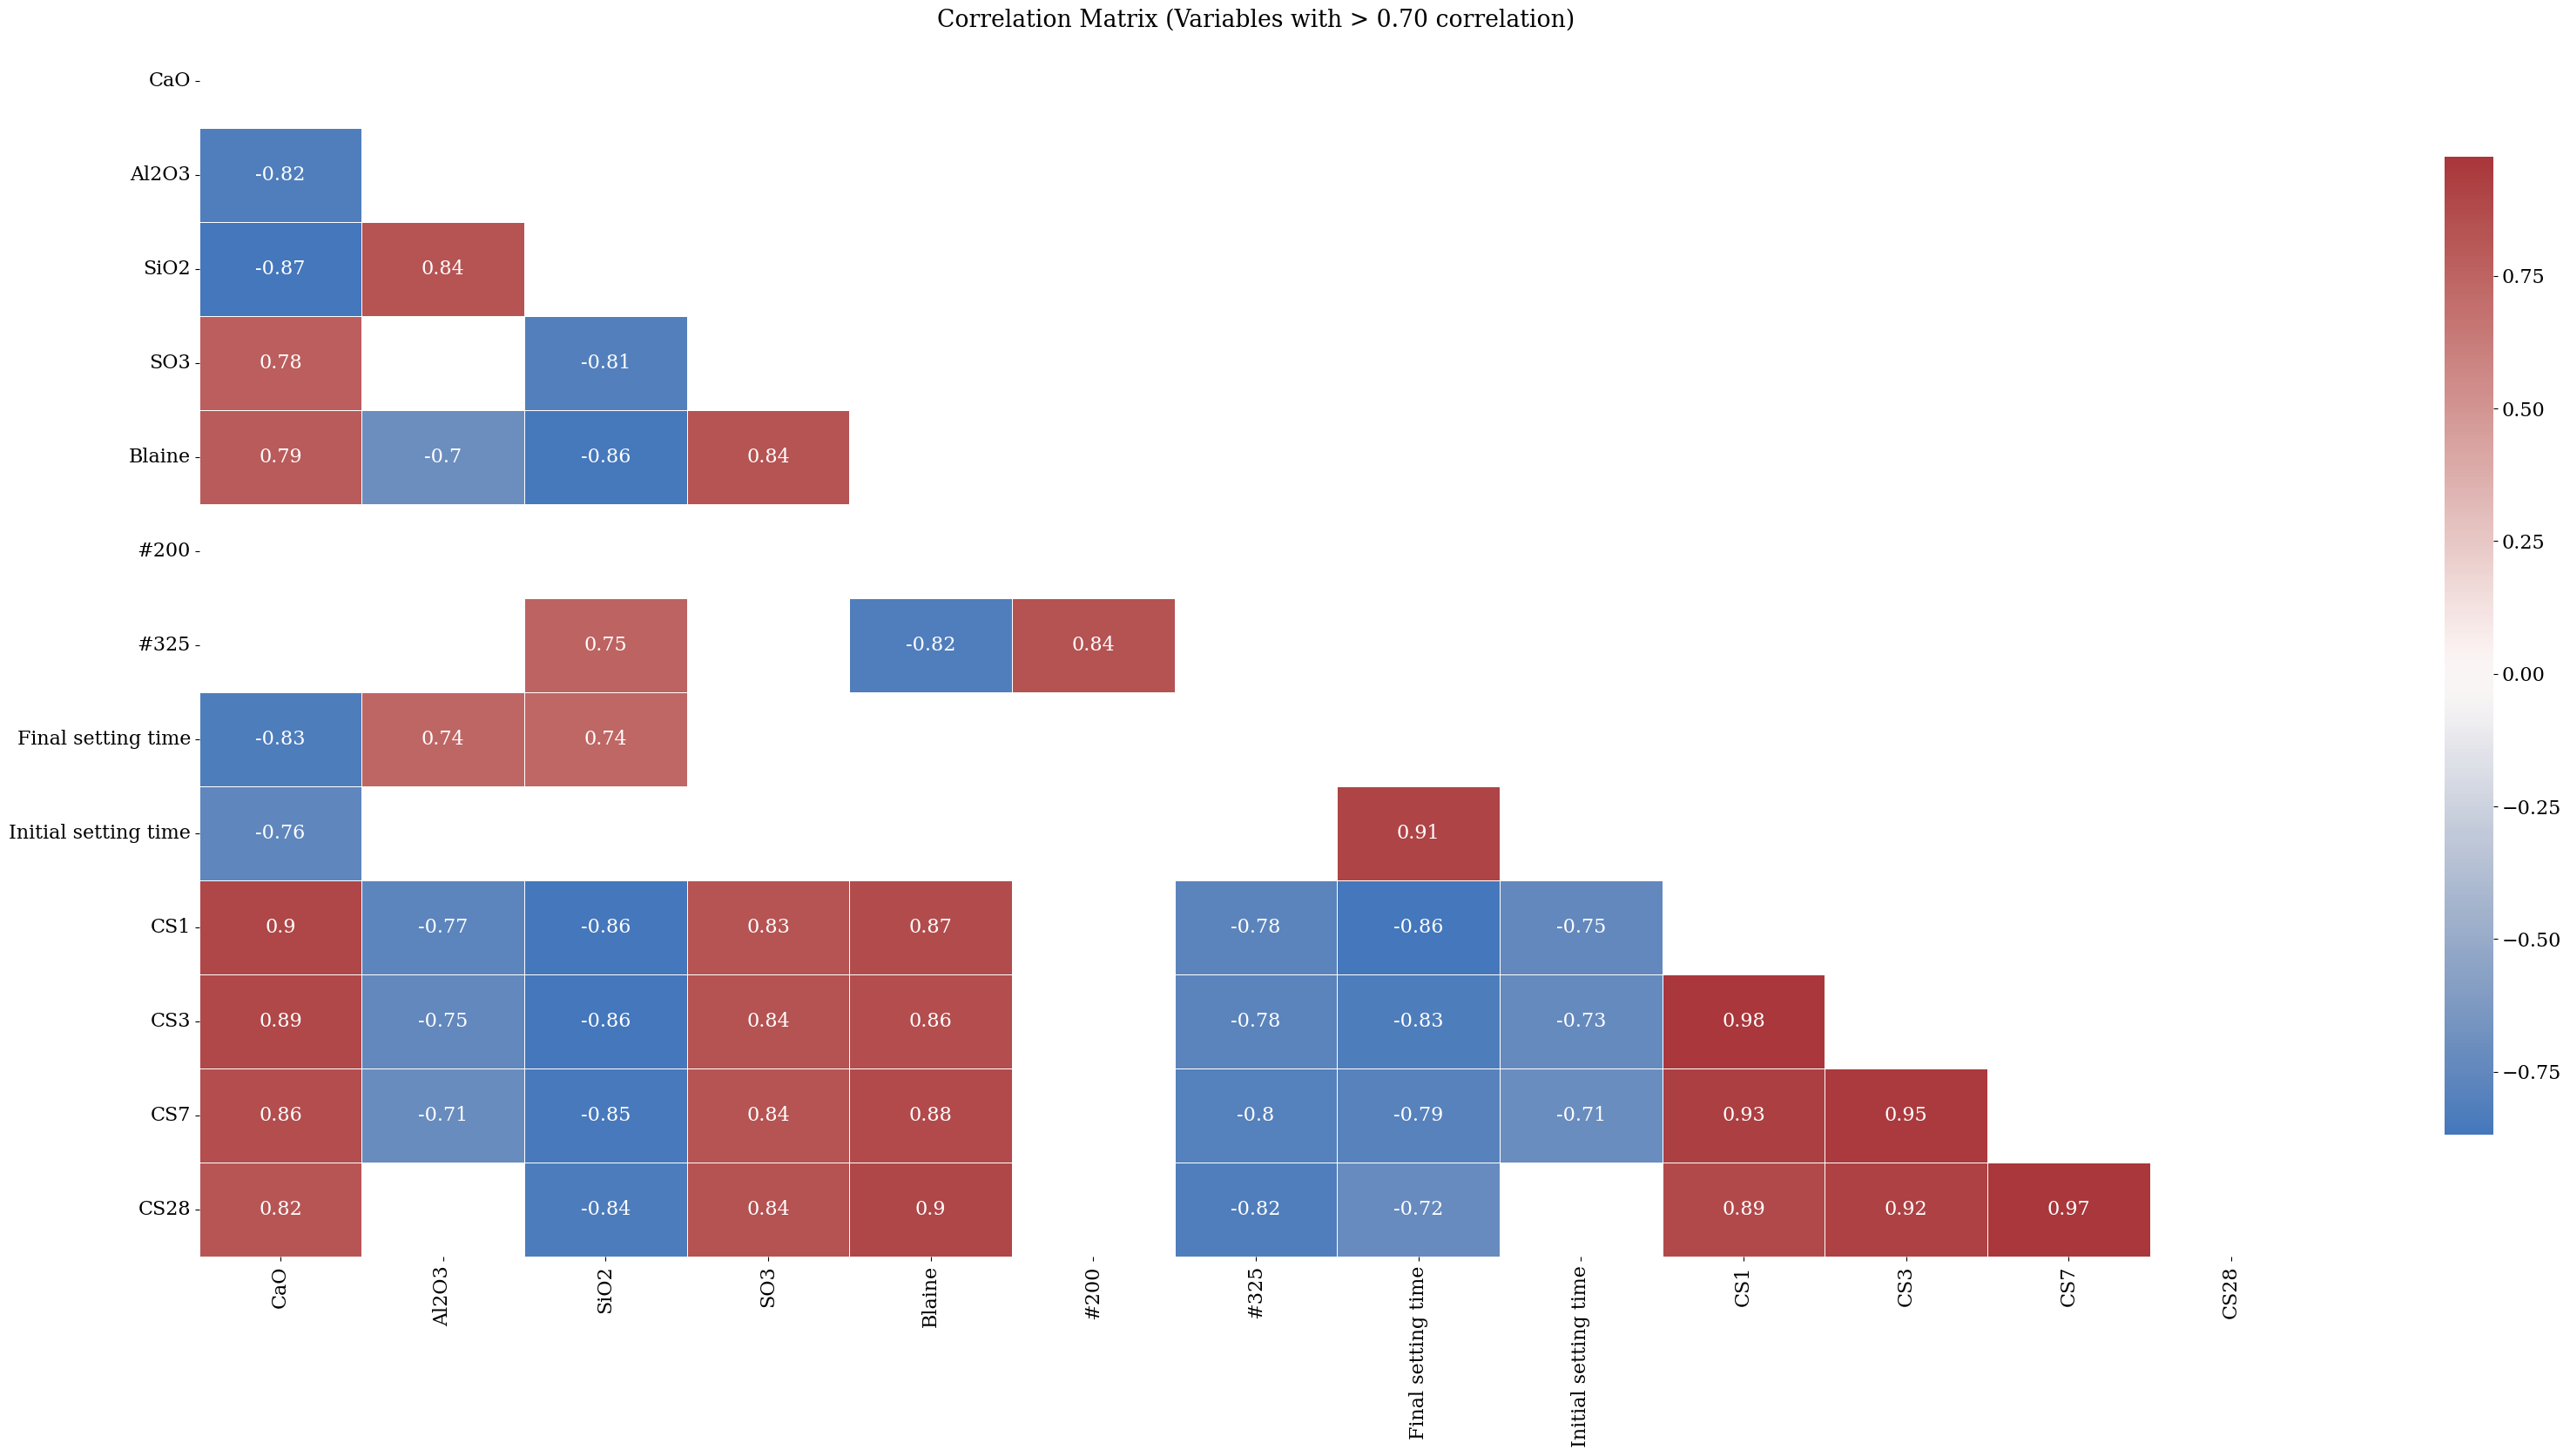

<IPython.core.display.Javascript object>

In [47]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [48]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS1                   CS3                     0.975042
CS7                   CS28                    0.969952
CS3                   CS7                     0.952567
CS1                   CS7                     0.927522
CS3                   CS28                    0.918733
Final setting time    Initial setting time    0.906976
Blaine                CS28                    0.898829
CaO                   CS1                     0.896319
                      CS3                     0.890642
CS1                   CS28                    0.888076
Blaine                CS7                     0.880245
CaO                   SiO2                    0.868822
Blaine                CS1                     0.867330
Final setting time    CS1                     0.864282
SiO2                  CS1                     0.864057
Blaine                CS3                     0.863943
SiO2                  CS3                     0.863919
CaO                   CS7                     0.862900
SiO2      

<IPython.core.display.Javascript object>

In [49]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.969952
CS3                   CS28    0.918733
Blaine                CS28    0.898829
CS1                   CS28    0.888076
SO3                   CS28    0.842603
SiO2                  CS28    0.836908
#325                  CS28    0.820261
CaO                   CS28    0.819299
Final setting time    CS28    0.723222
#200                  CS28    0.678153
Al2O3                 CS28    0.665708
Initial setting time  CS28    0.646100
Insoluble Residue     CS28    0.516841
Loss on Ignition      CS28    0.262550
TiO2                  CS28    0.256242
Specific Gravity      CS28    0.244010
K2O                   CS28    0.137378
MgO                   CS28    0.100508
Fe2O3                 CS28    0.098874
Na2O                  CS28    0.091833
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

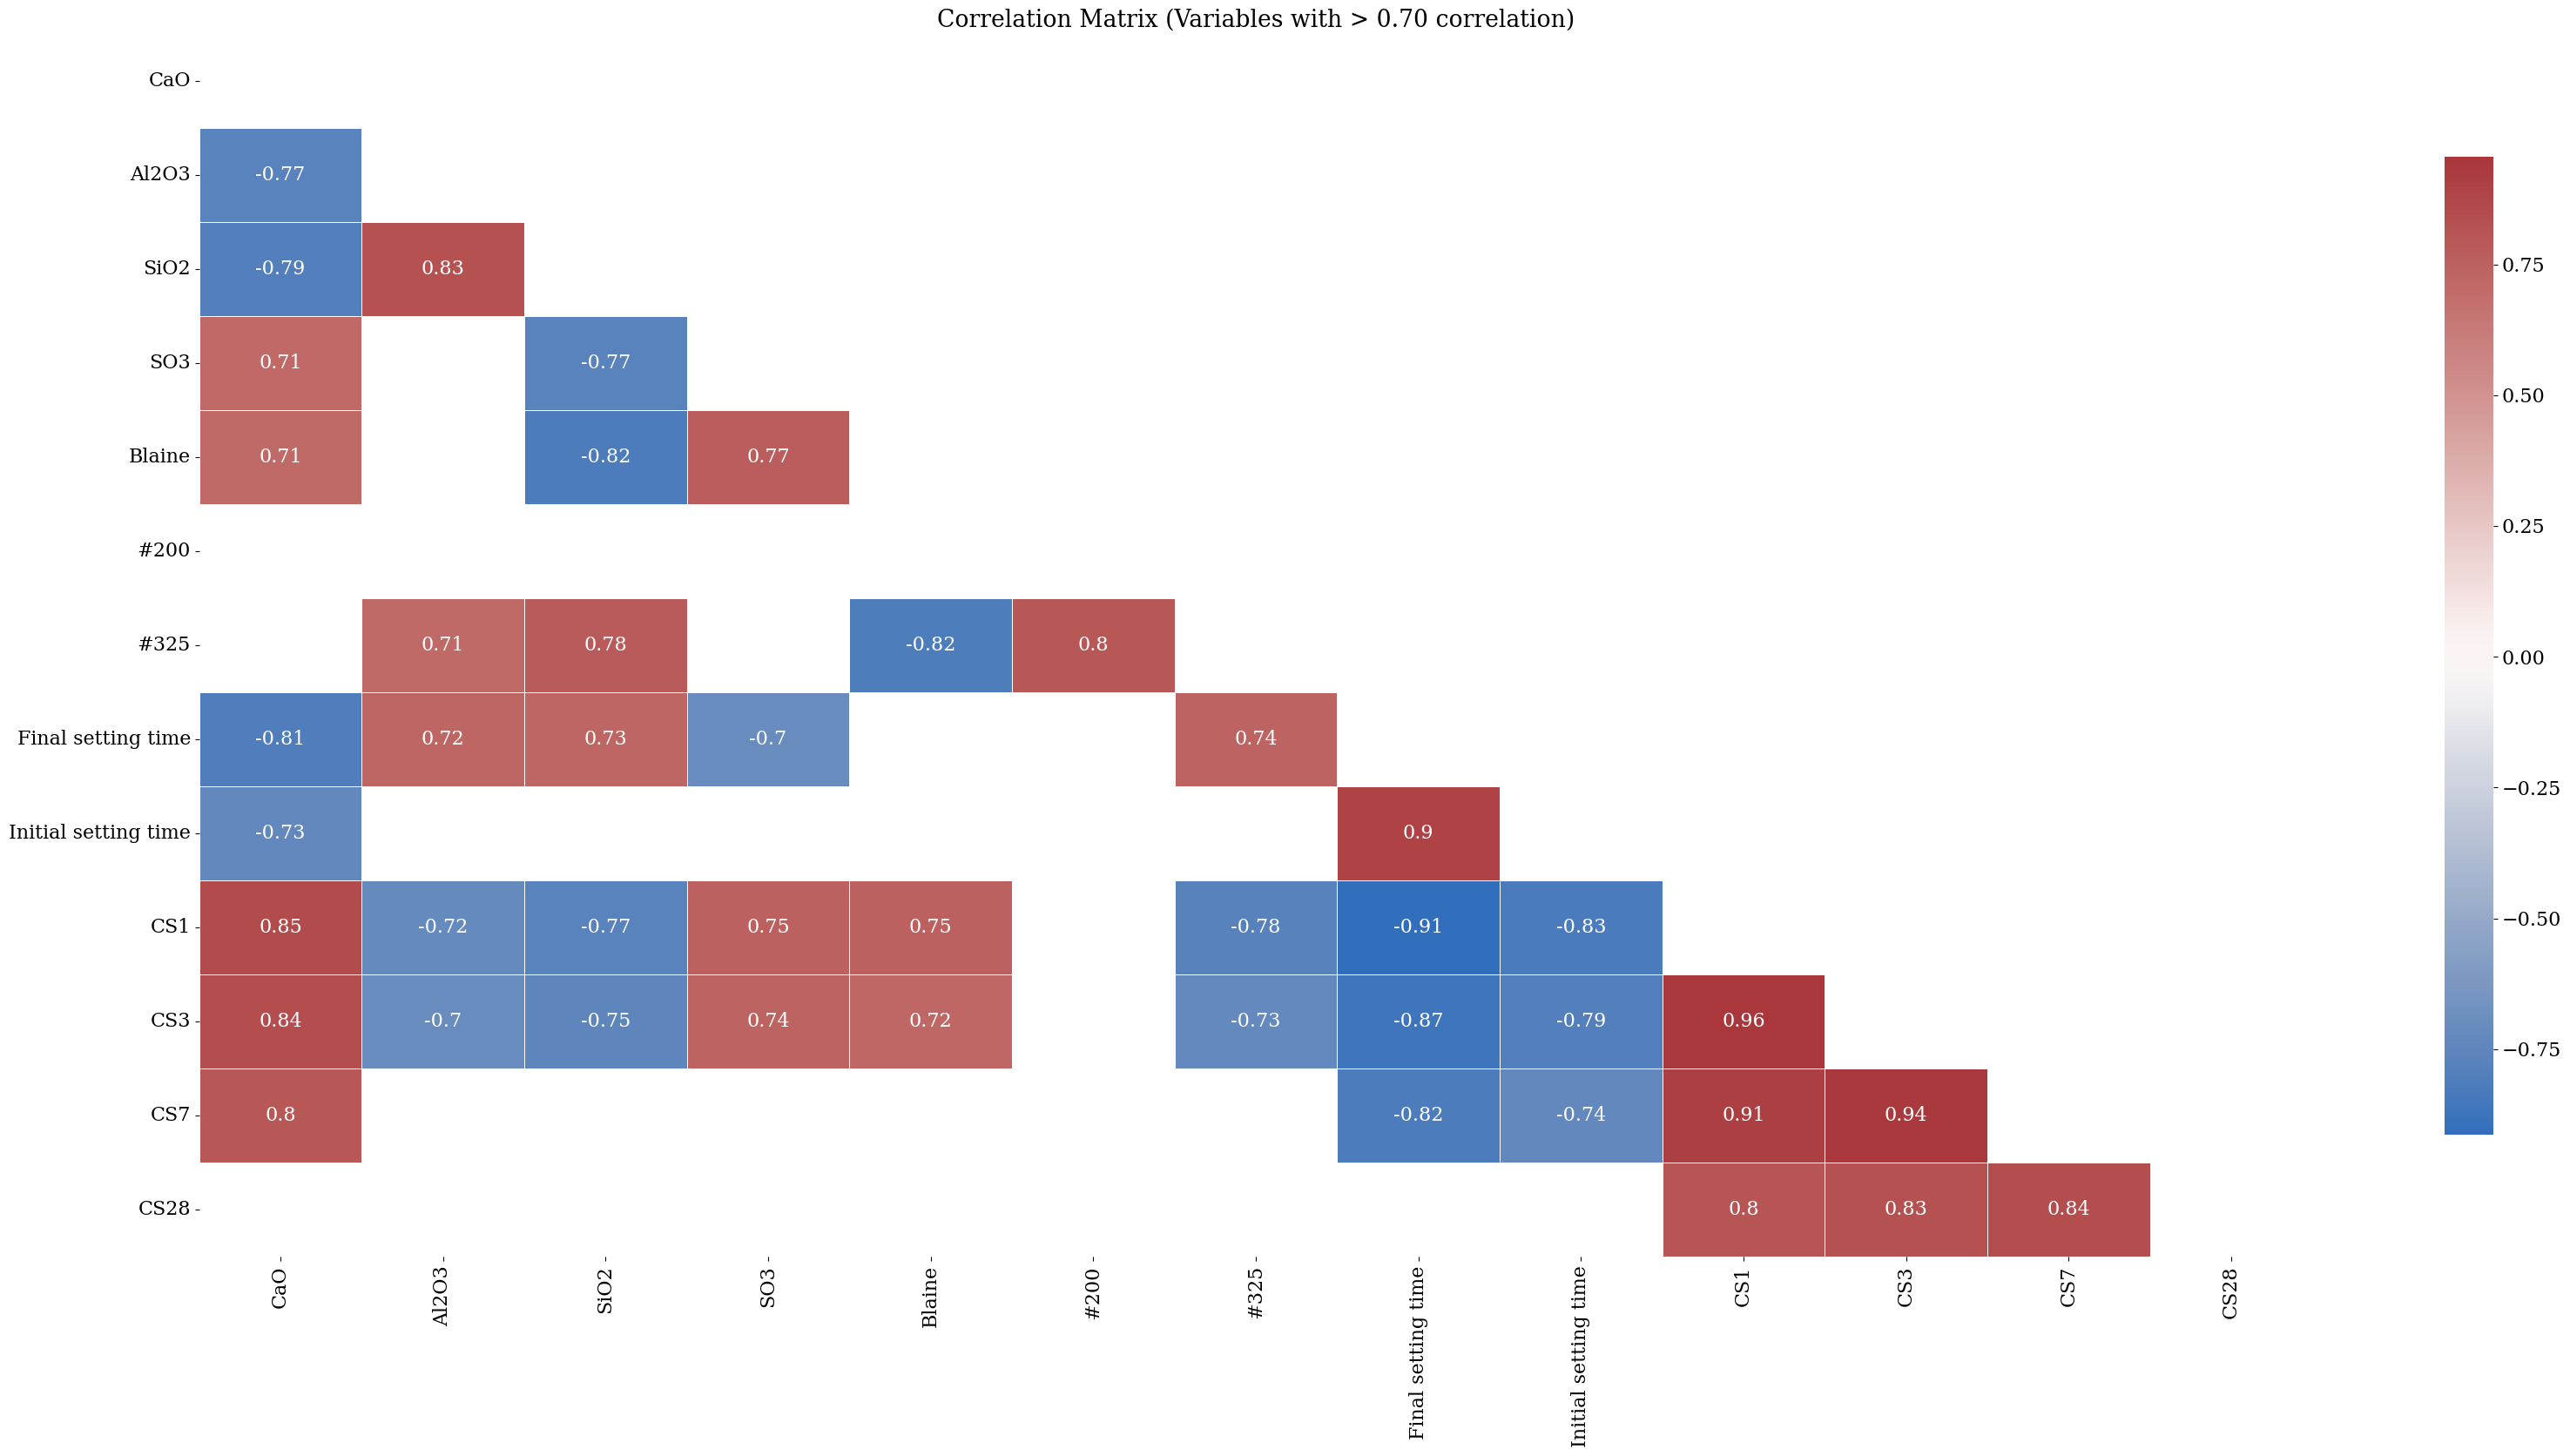

<IPython.core.display.Javascript object>

In [50]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [51]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS1                   CS3                     0.956001
CS3                   CS7                     0.939561
Final setting time    CS1                     0.913241
CS1                   CS7                     0.906786
Final setting time    Initial setting time    0.895824
                      CS3                     0.868280
CaO                   CS1                     0.846702
                      CS3                     0.843718
CS7                   CS28                    0.842512
Initial setting time  CS1                     0.831963
CS3                   CS28                    0.827819
Al2O3                 SiO2                    0.827589
Final setting time    CS7                     0.824041
SiO2                  Blaine                  0.820179
Blaine                #325                    0.815625
CaO                   Final setting time      0.807350
CS1                   CS28                    0.804623
CaO                   CS7                     0.801386
#200      

<IPython.core.display.Javascript object>

In [52]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.842512
CS3                   CS28    0.827819
CS1                   CS28    0.804623
Final setting time    CS28    0.685141
CaO                   CS28    0.679259
SO3                   CS28    0.658137
Blaine                CS28    0.641418
#325                  CS28    0.626187
SiO2                  CS28    0.621747
Initial setting time  CS28    0.618424
#200                  CS28    0.546776
Al2O3                 CS28    0.541564
Insoluble Residue     CS28    0.447603
MgO                   CS28    0.369994
Specific Gravity      CS28    0.315294
TiO2                  CS28    0.293062
Loss on Ignition      CS28    0.277724
K2O                   CS28    0.183297
Na2O                  CS28    0.053785
Fe2O3                 CS28    0.049243
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

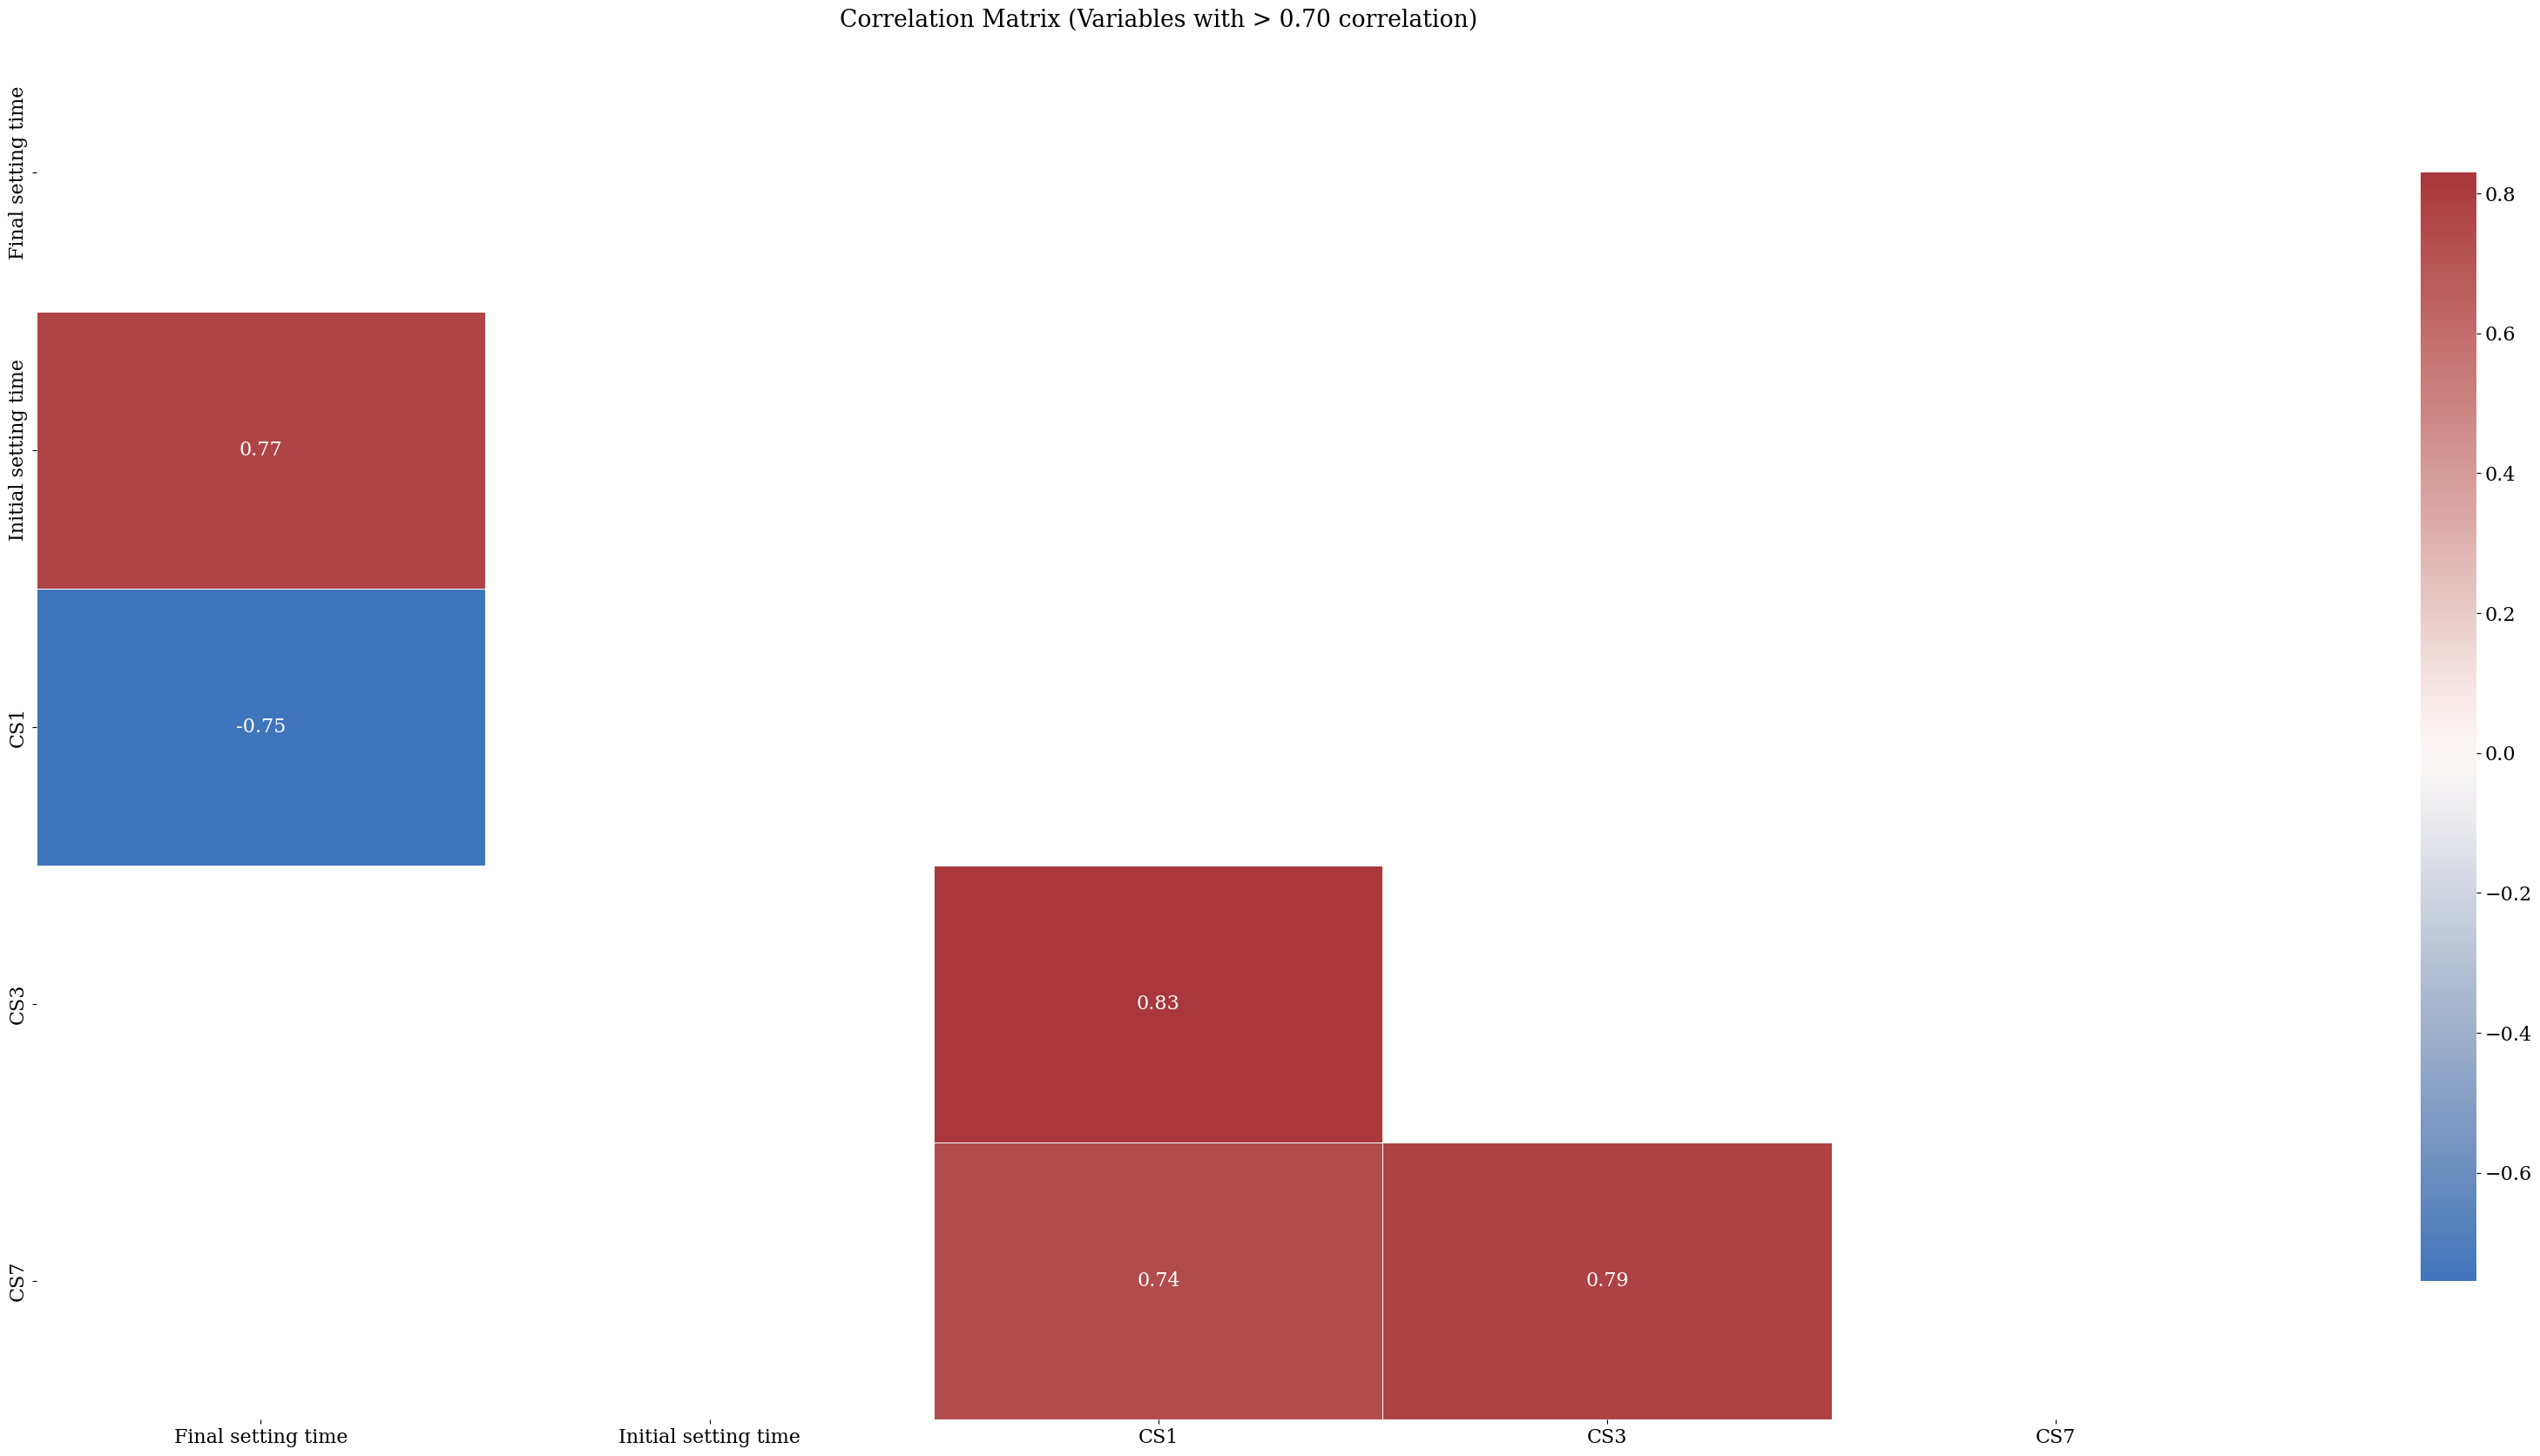

<IPython.core.display.Javascript object>

In [53]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall")

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]

df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)

if len(df_corr) > 0:
    labels = np.where(
        np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
    )

    plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
    # plt.show()

    sns.heatmap(
        df_corr,
        mask=np.triu(np.ones_like(df_corr, dtype=bool)),
        square=False,
        center=0,
        annot=labels,
        fmt="",
        linewidths=0.5,
        cmap="vlag",
        cbar_kws={"shrink": 0.8},
        ax=ax,
    )

    plt.tight_layout()

In [54]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS1                 CS3                     0.829416
CS3                 CS7                     0.785938
Final setting time  Initial setting time    0.773473
                    CS1                     0.754830
CS1                 CS7                     0.738269
dtype: float64

<IPython.core.display.Javascript object>

In [55]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.653962
CS3                   CS28    0.634782
CS1                   CS28    0.612800
Final setting time    CS28    0.509340
CaO                   CS28    0.481247
SO3                   CS28    0.463746
Initial setting time  CS28    0.453439
Blaine                CS28    0.445495
#325                  CS28    0.430683
SiO2                  CS28    0.425823
#200                  CS28    0.390634
Al2O3                 CS28    0.369642
Insoluble Residue     CS28    0.303343
MgO                   CS28    0.250423
Specific Gravity      CS28    0.229674
TiO2                  CS28    0.199897
Loss on Ignition      CS28    0.180624
K2O                   CS28    0.120556
Na2O                  CS28    0.035893
Fe2O3                 CS28    0.034678
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

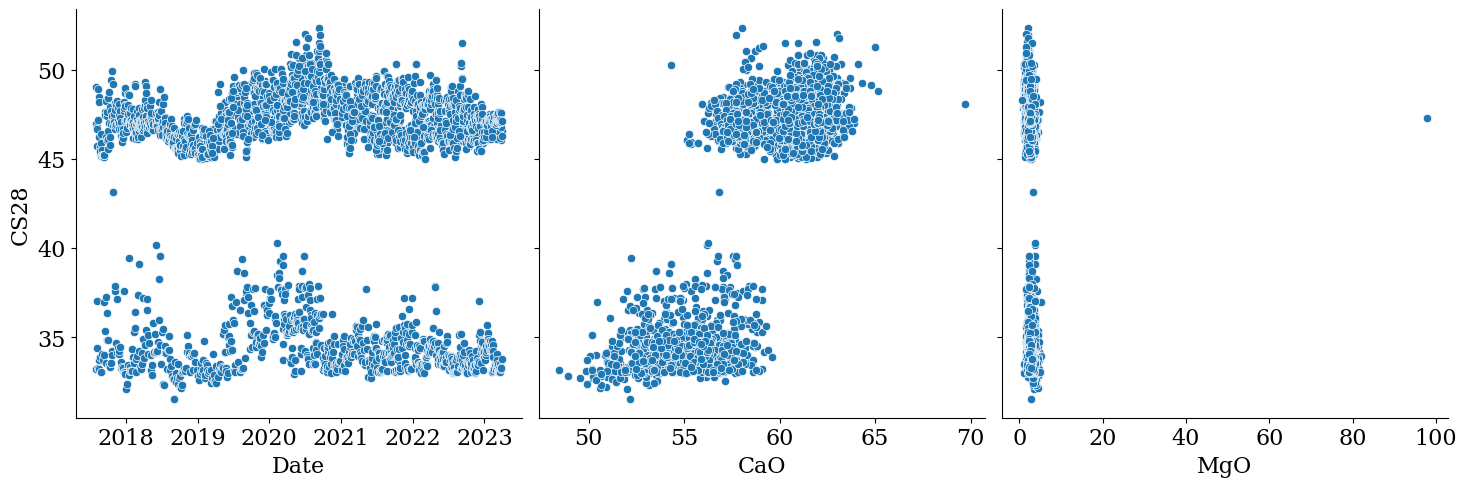

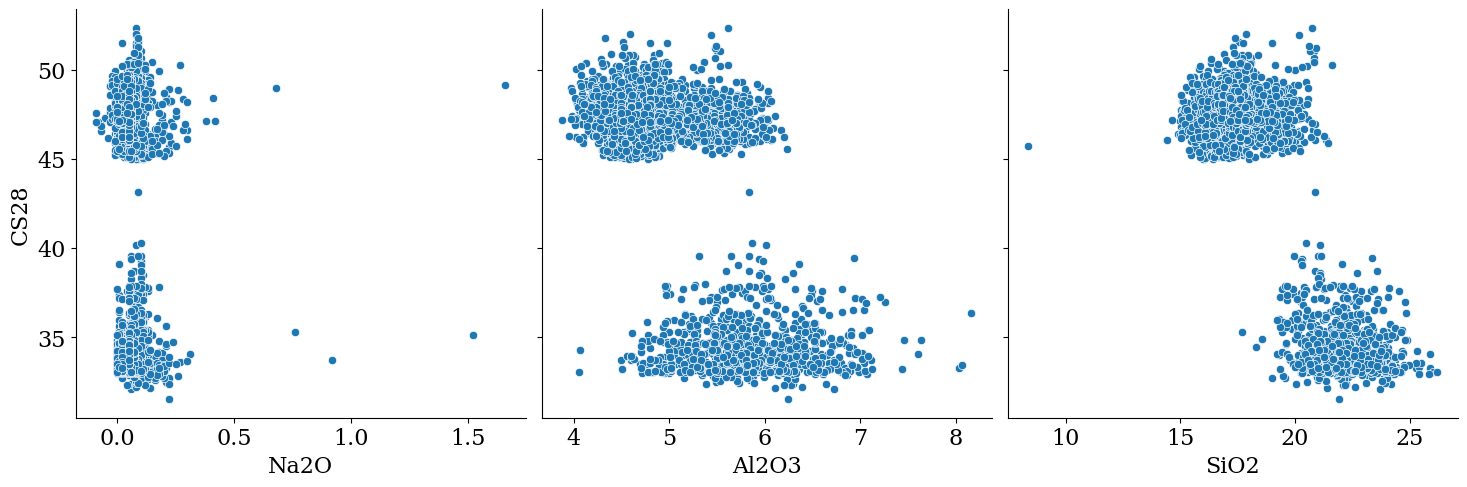

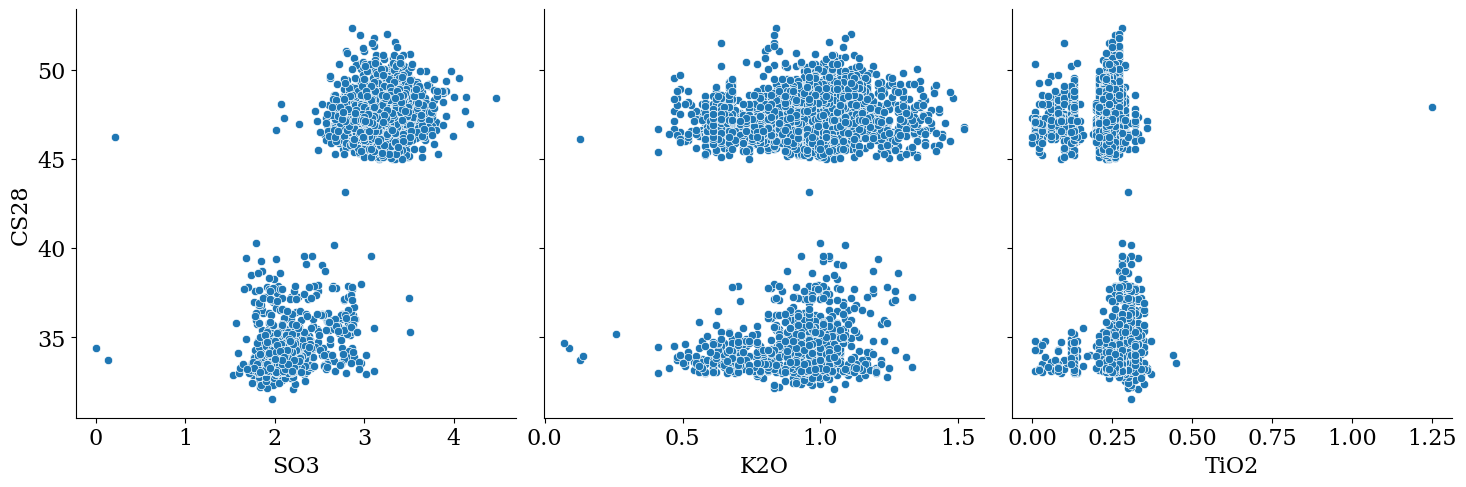

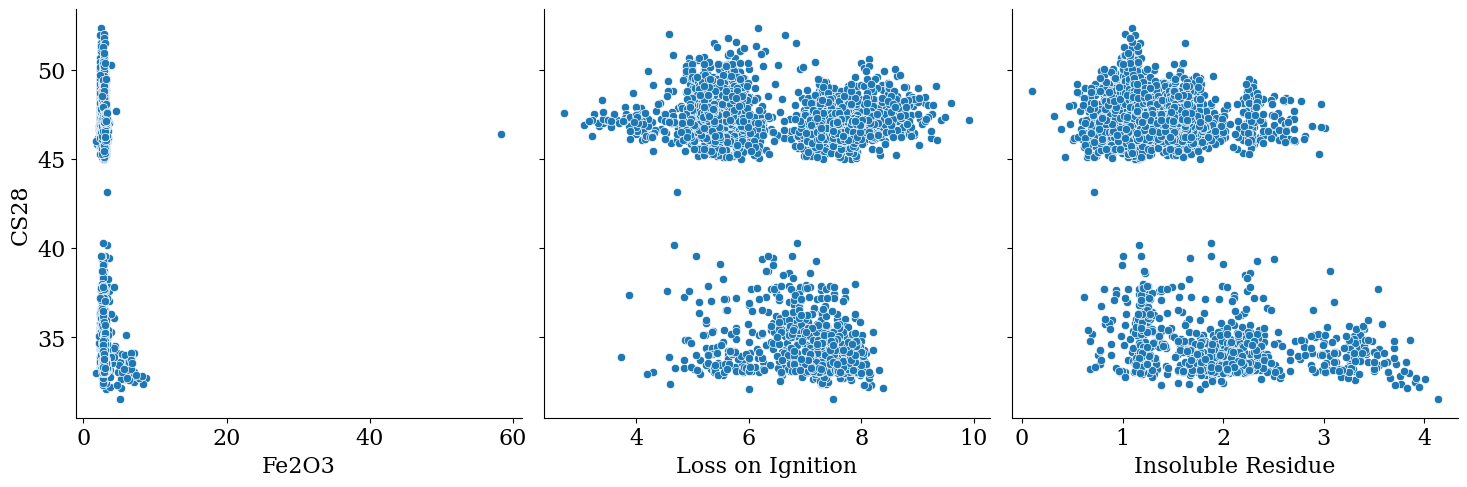

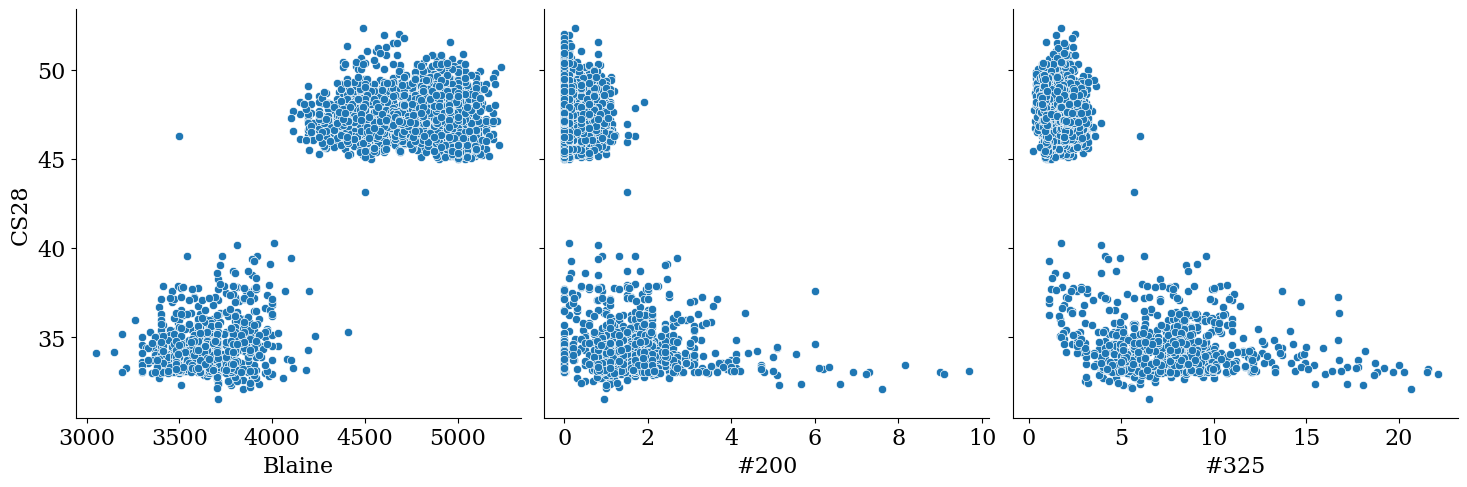

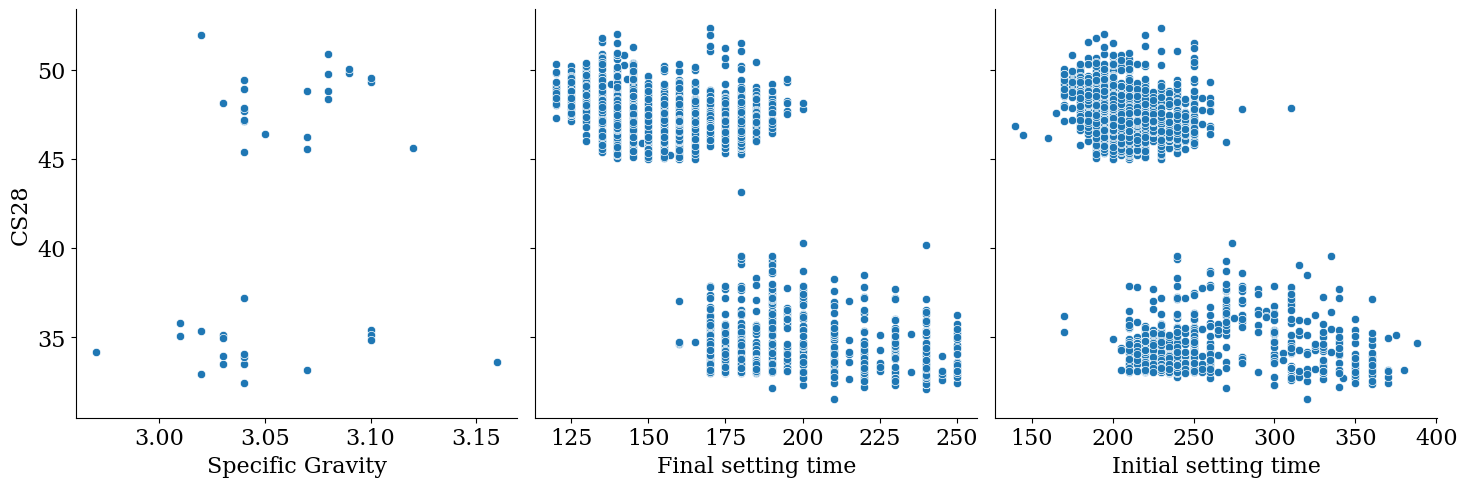

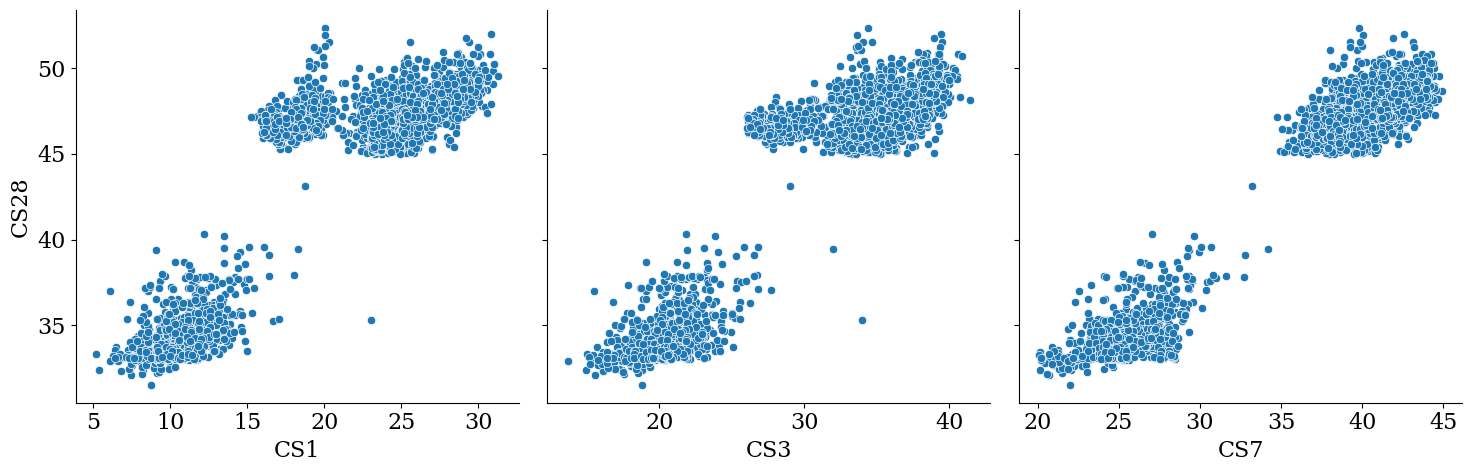

<IPython.core.display.Javascript object>

In [56]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [57]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

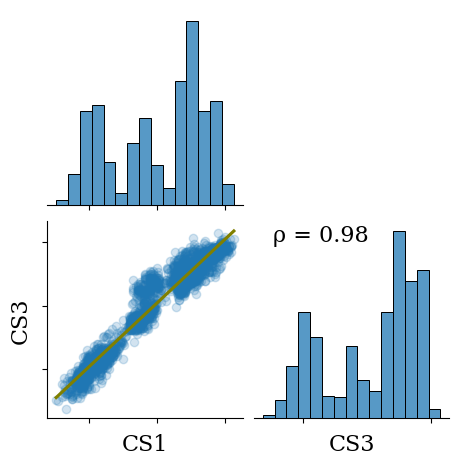

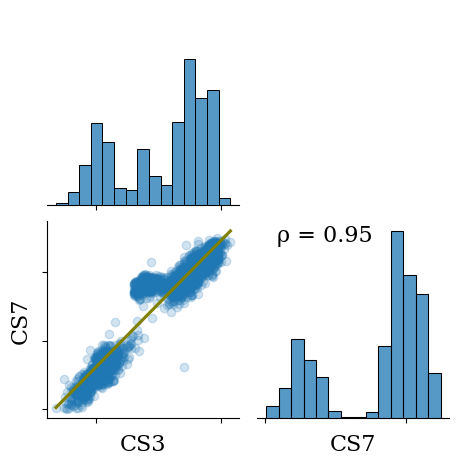

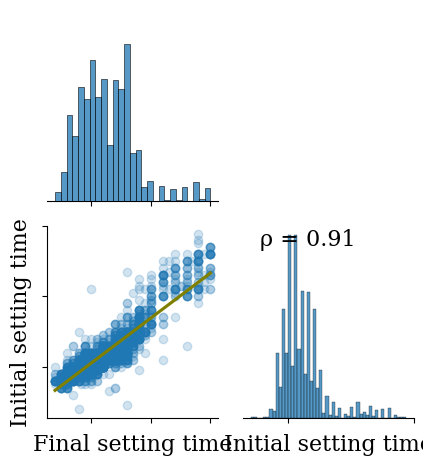

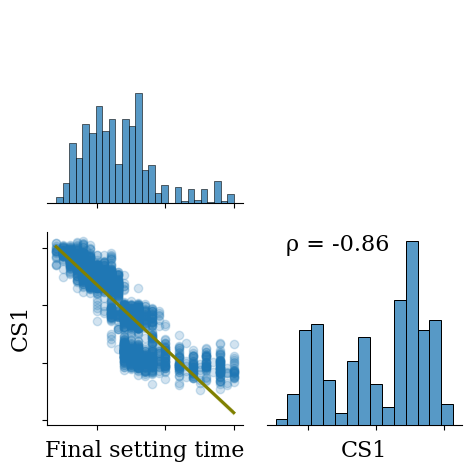

<IPython.core.display.Javascript object>

In [58]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [59]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

991 valid days out of 1209


<IPython.core.display.Javascript object>

In [60]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2017, 2018, 2019, 2020, 2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [61]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2017: {6, 7, 8, 9, 10, 11, 12},
 2018: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4}}

<IPython.core.display.Javascript object>

In [62]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2017  6         1
      7         2
      8        17
      9        18
      10       18
               ..
2022  12       17
2023  1        18
      2        15
      3        19
      4        12
Name: Unique days per month, Length: 71, dtype: int64


<IPython.core.display.Javascript object>

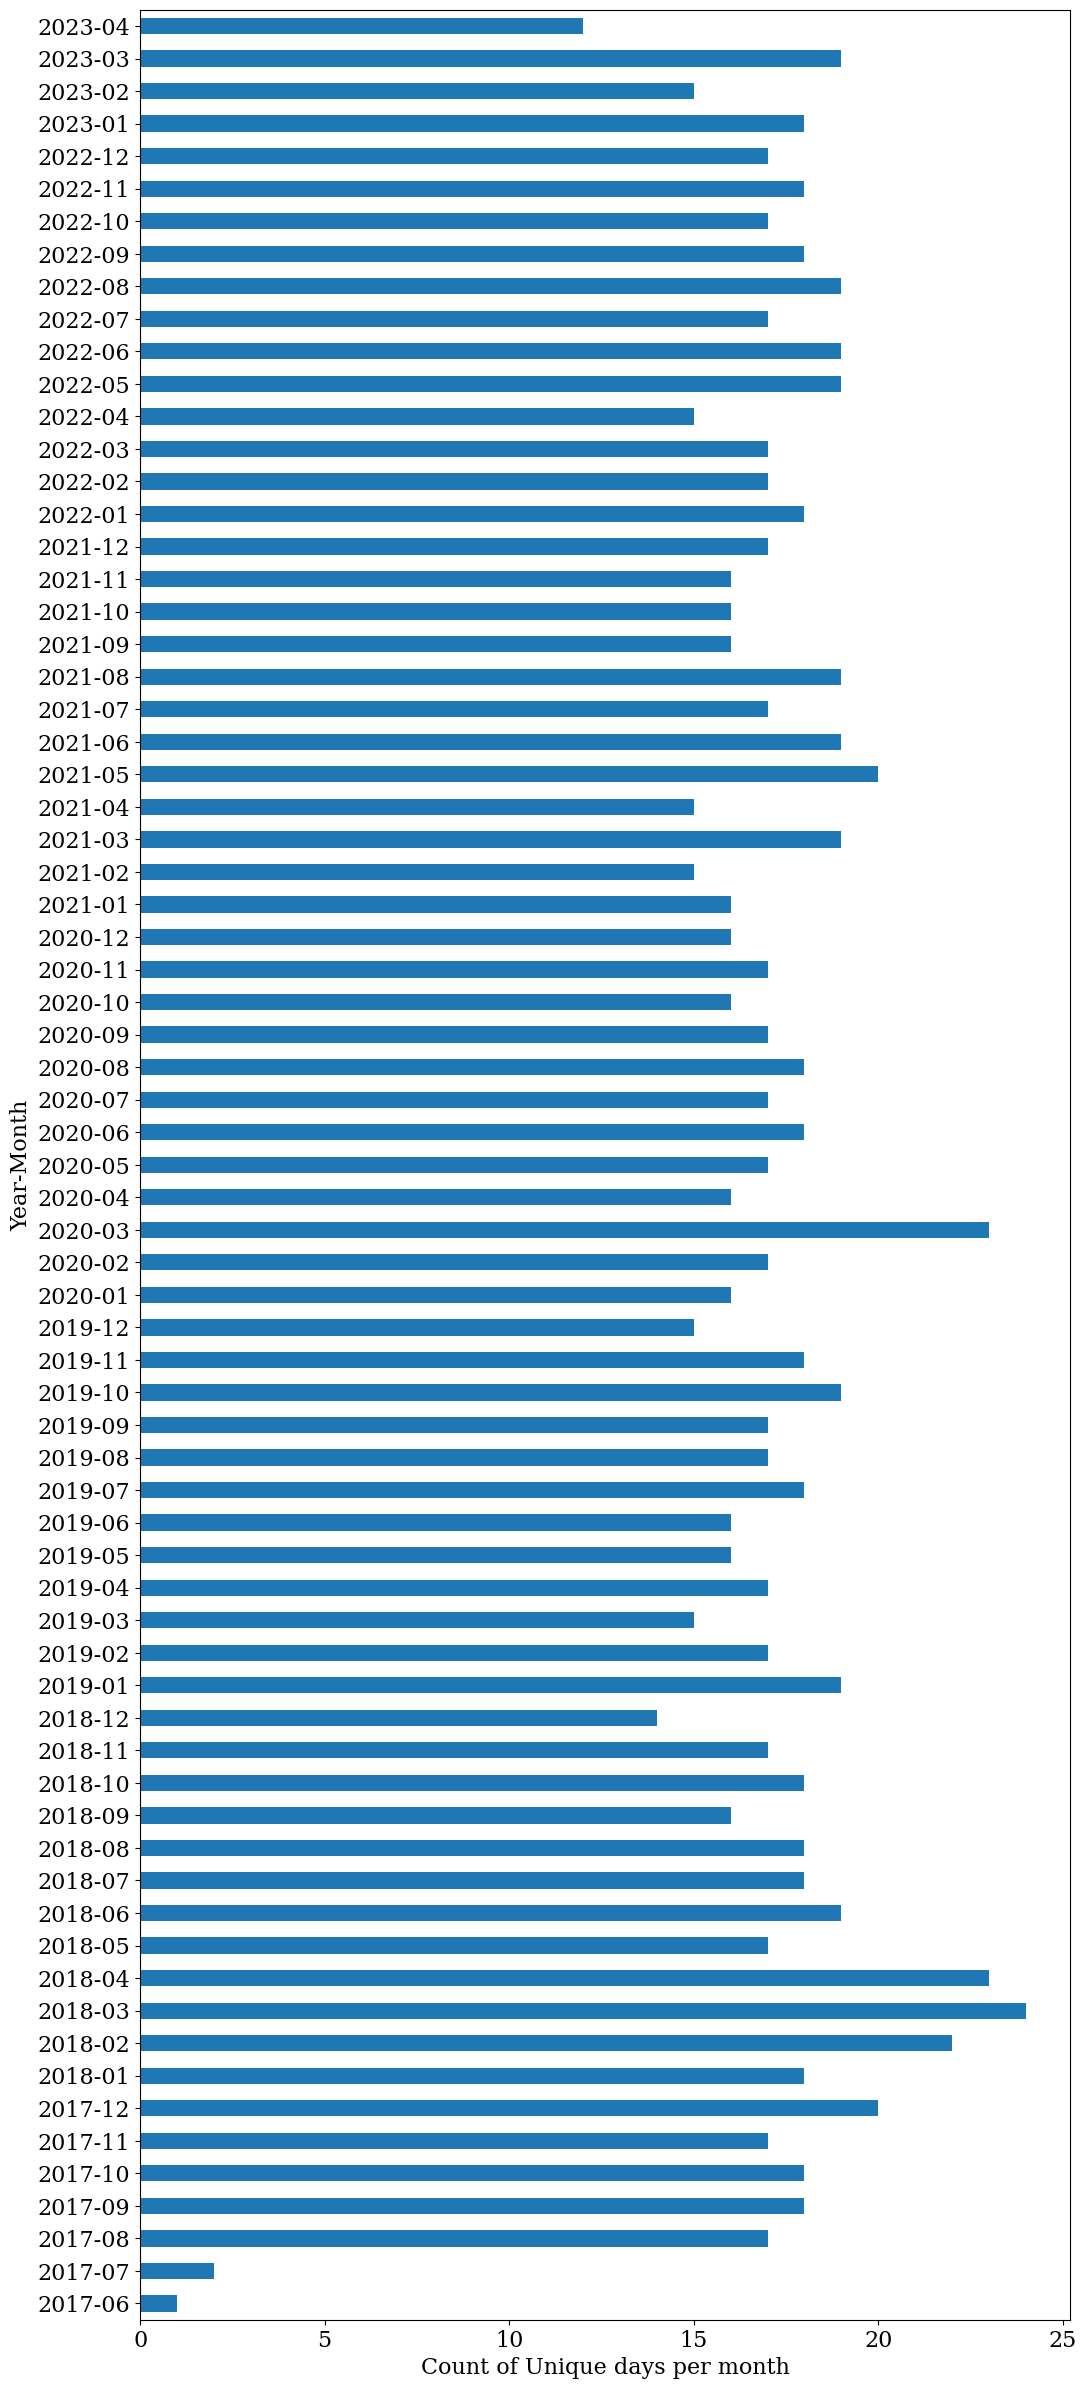

<IPython.core.display.Javascript object>

In [63]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [64]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2017  6         1
      7         2
      8        26
      9        26
      10       26
               ..
2022  12       53
2023  1        53
      2        51
      3        65
      4        42
Name: size, Length: 71, dtype: int64


<IPython.core.display.Javascript object>

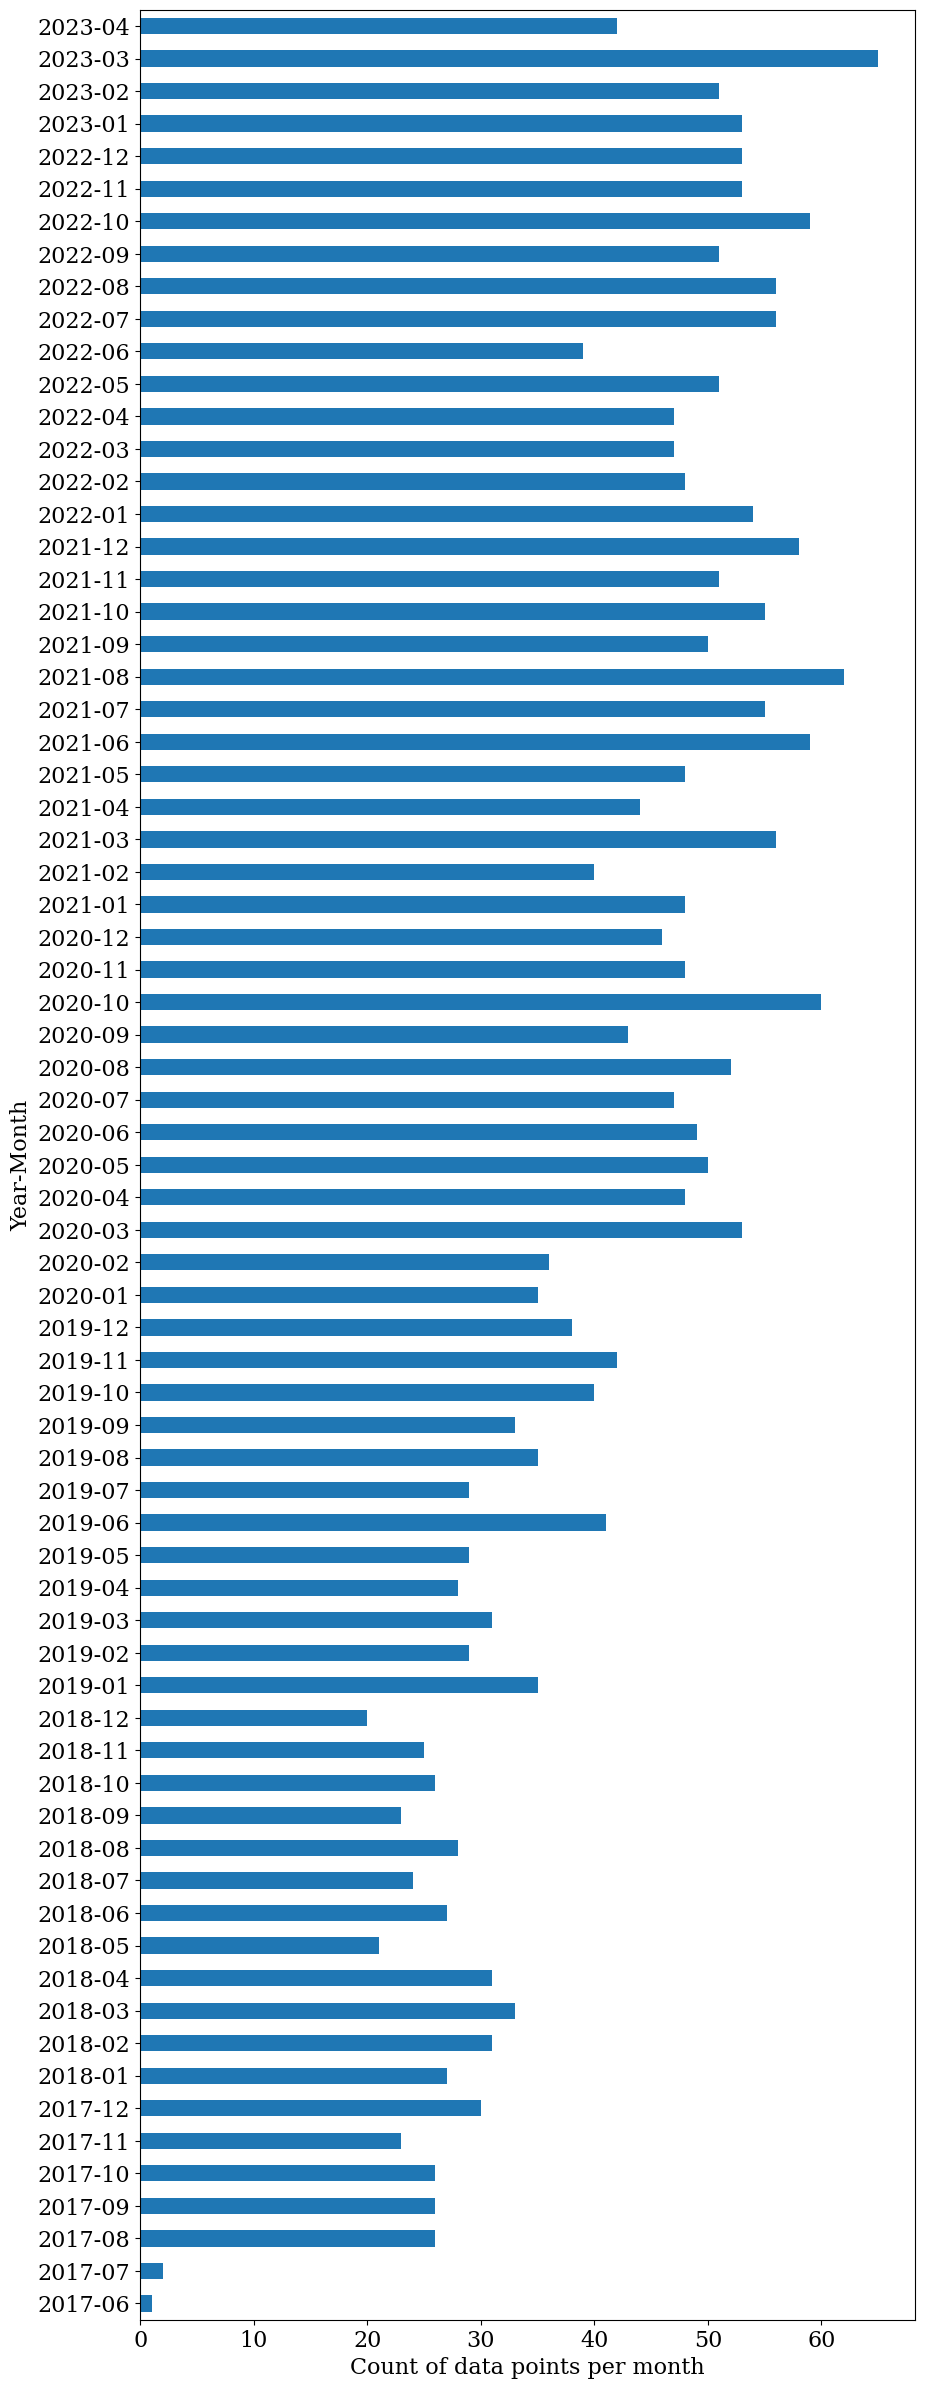

<IPython.core.display.Javascript object>

In [65]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [66]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2017-6 has the minimum number of days with samples - 1
2023-3 has the maximum number of days with samples - 65


<IPython.core.display.Javascript object>

In [67]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2017: 19, 2018: 26, 2019: 34, 2020: 47, 2021: 52, 2022: 51, 2023: 52}

Mean number of observations - all years
40


<IPython.core.display.Javascript object>

In [68]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  1209.000000
mean      2.380480
std       1.001232
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000

<IPython.core.display.Javascript object>

In [69]:
day_counts[["DayCount"]].value_counts()

DayCount
3           391
2           376
1           275
4           158
5             8
6             1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
935  2022      1    3         6

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

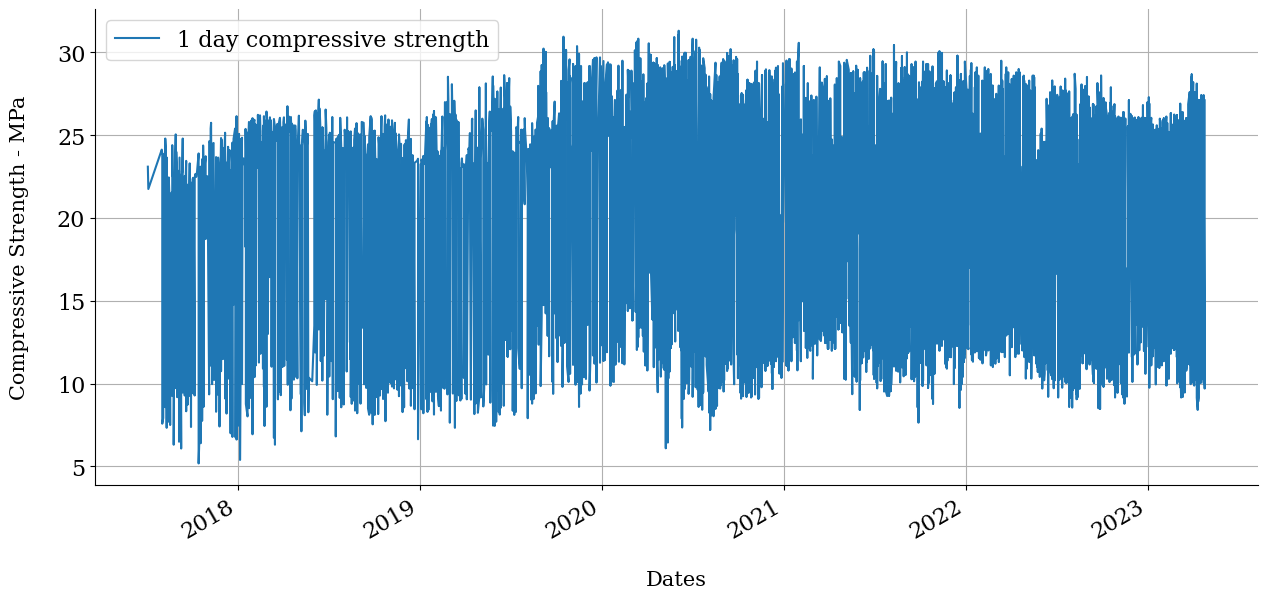

<IPython.core.display.Javascript object>

In [71]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

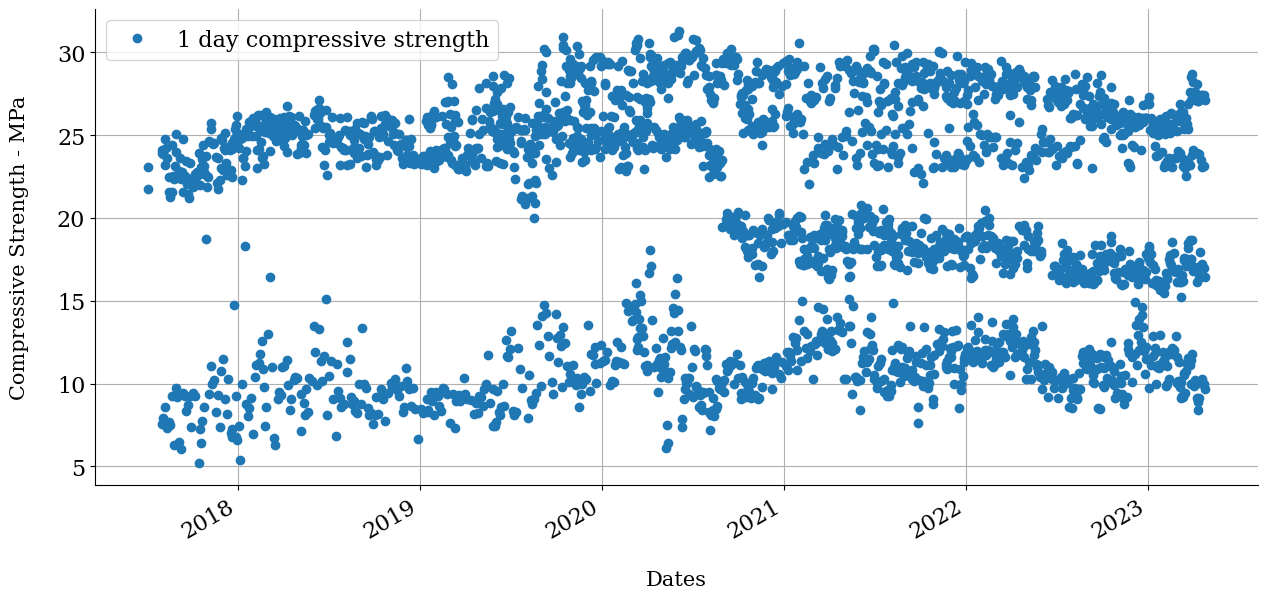

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 3 Days

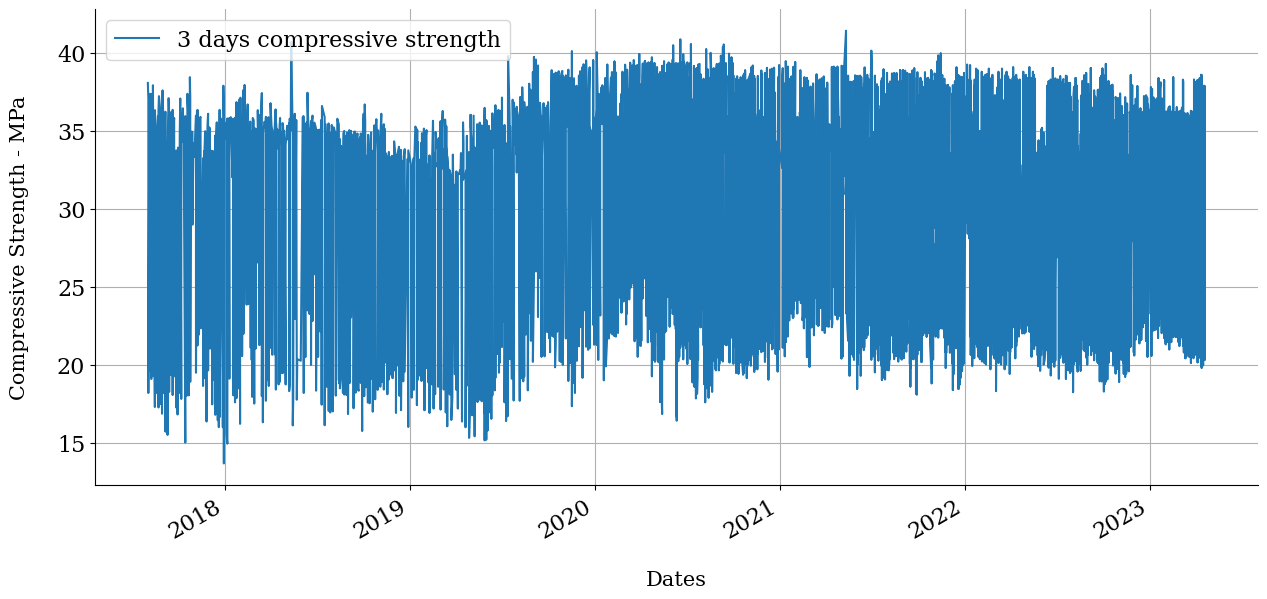

<IPython.core.display.Javascript object>

In [73]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

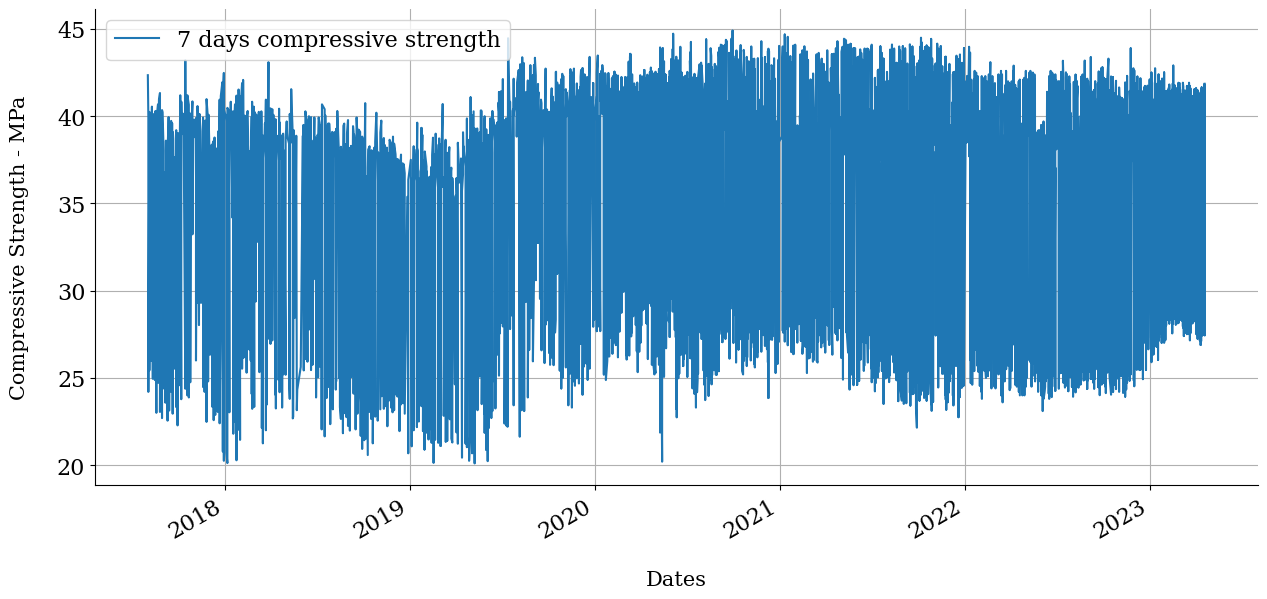

<IPython.core.display.Javascript object>

In [74]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

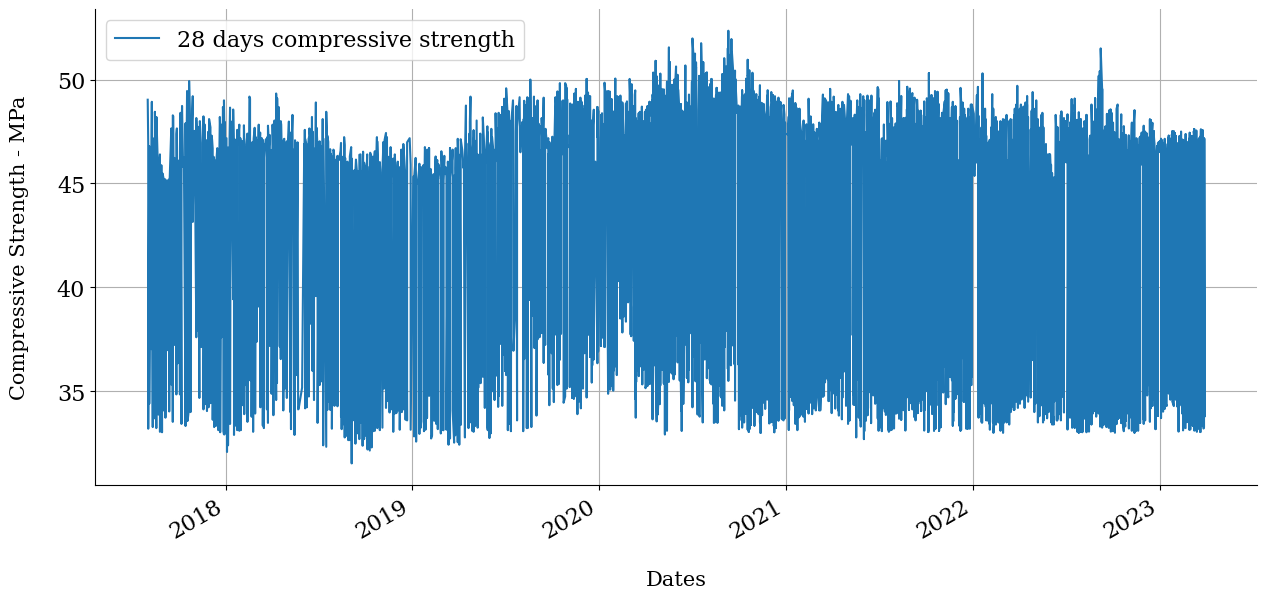

<IPython.core.display.Javascript object>

In [75]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()